## Notebook Nettoyage

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pip
import pandas as pd
import re
import statistics
%matplotlib inline

print('Version de pandas: ', pd.__version__)
print('Version de seaborn: ', sns.__version__)
print('Version de numpy: ', np.__version__)

Version de pandas:  1.2.4
Version de seaborn:  0.11.0
Version de numpy:  1.19.2


In [2]:
# Chargement

foodData = pd.read_csv("en.openfoodfacts.org.products.csv", sep='\t')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

C:\Users\Alexis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,47,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
foodData.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:

In [4]:
foodData.shape

(1772411, 186)

Regardons le nombre de valeurs manquantes pour chaque colonne afin de voir si nous pouvons supprimer des colonnes qui seraient inutiles.

In [5]:
listeColonneNaN = foodData.isna().sum()
listeVariable = foodData.columns
foodDataset = foodData.copy()
listeColonneNaN

code                                                0
url                                                 0
creator                                             4
created_t                                           0
created_datetime                                    0
last_modified_t                                     0
last_modified_datetime                              0
product_name                                    77526
abbreviated_product_name                      1768751
generic_name                                  1658485
quantity                                      1314973
packaging                                     1488074
packaging_tags                                1488101
packaging_text                                1768415
brands                                         848693
brands_tags                                    848750
categories                                     923621
categories_tags                                923623
categories_en               

In [6]:
nombreNan = 0
nombrevaleur = foodData.shape[0] * foodData.shape[1]
for variable in foodData.columns:
    nombreNan = nombreNan + foodData[variable].isna().sum()
    
print("Taux de NaN pour le dataset: ", (nombreNan / nombrevaleur)*100)

Taux de NaN pour le dataset:  79.57177133052036


In [7]:
def tauxDeNan_Affichage(variable):
        print('La variable', variable, 'contient', (foodDataset[variable].isna().sum()/foodDataset.shape[0]) * 100,'% de valeur NaN')

def tauxDeNan(variable):
        return (foodDataset[variable].isna().sum()/foodDataset.shape[0])*100

In [8]:
tauxDeNan('salt_100g')

23.85908234602471

Regardons rapidement si nous avons des variables ayant 100% de valeurs NaN:

In [9]:
listeVariableASupp = []
for variable in listeVariable:
    if tauxDeNan(variable) == 100:
        listeVariableASupp.append(variable)

In [10]:
listeVariableASupp

['cities',
 'allergens_en',
 'no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil']

Nous pouvons supprimer ces variables sans conséquences, puisque qu'elles ont 100% de valeur NaN.

In [11]:
for variable in listeVariableASupp:
    foodDataset.drop(variable, axis = 1, inplace = True)

De même créons une fonction qui supprimera les variables supérieur à un taux choisi:

In [12]:
def suppressionVariable(dataset, tauxDeSuppression):
    print("Forme du dataset avant suppression: ", foodDataset.shape)
    for variable in listeVariableGardées:
        if tauxDeNan(variable)> tauxDeSuppression:
            foodDataset.drop(variable, axis=1, inplace=True)
    print("Forme du dataset après suppression: ", foodDataset.shape)
    
    return dataset

In [13]:
foodDataset.shape

(1772411, 181)

Regardons maintenant le taux de valeurs manquantes de chaque variable:

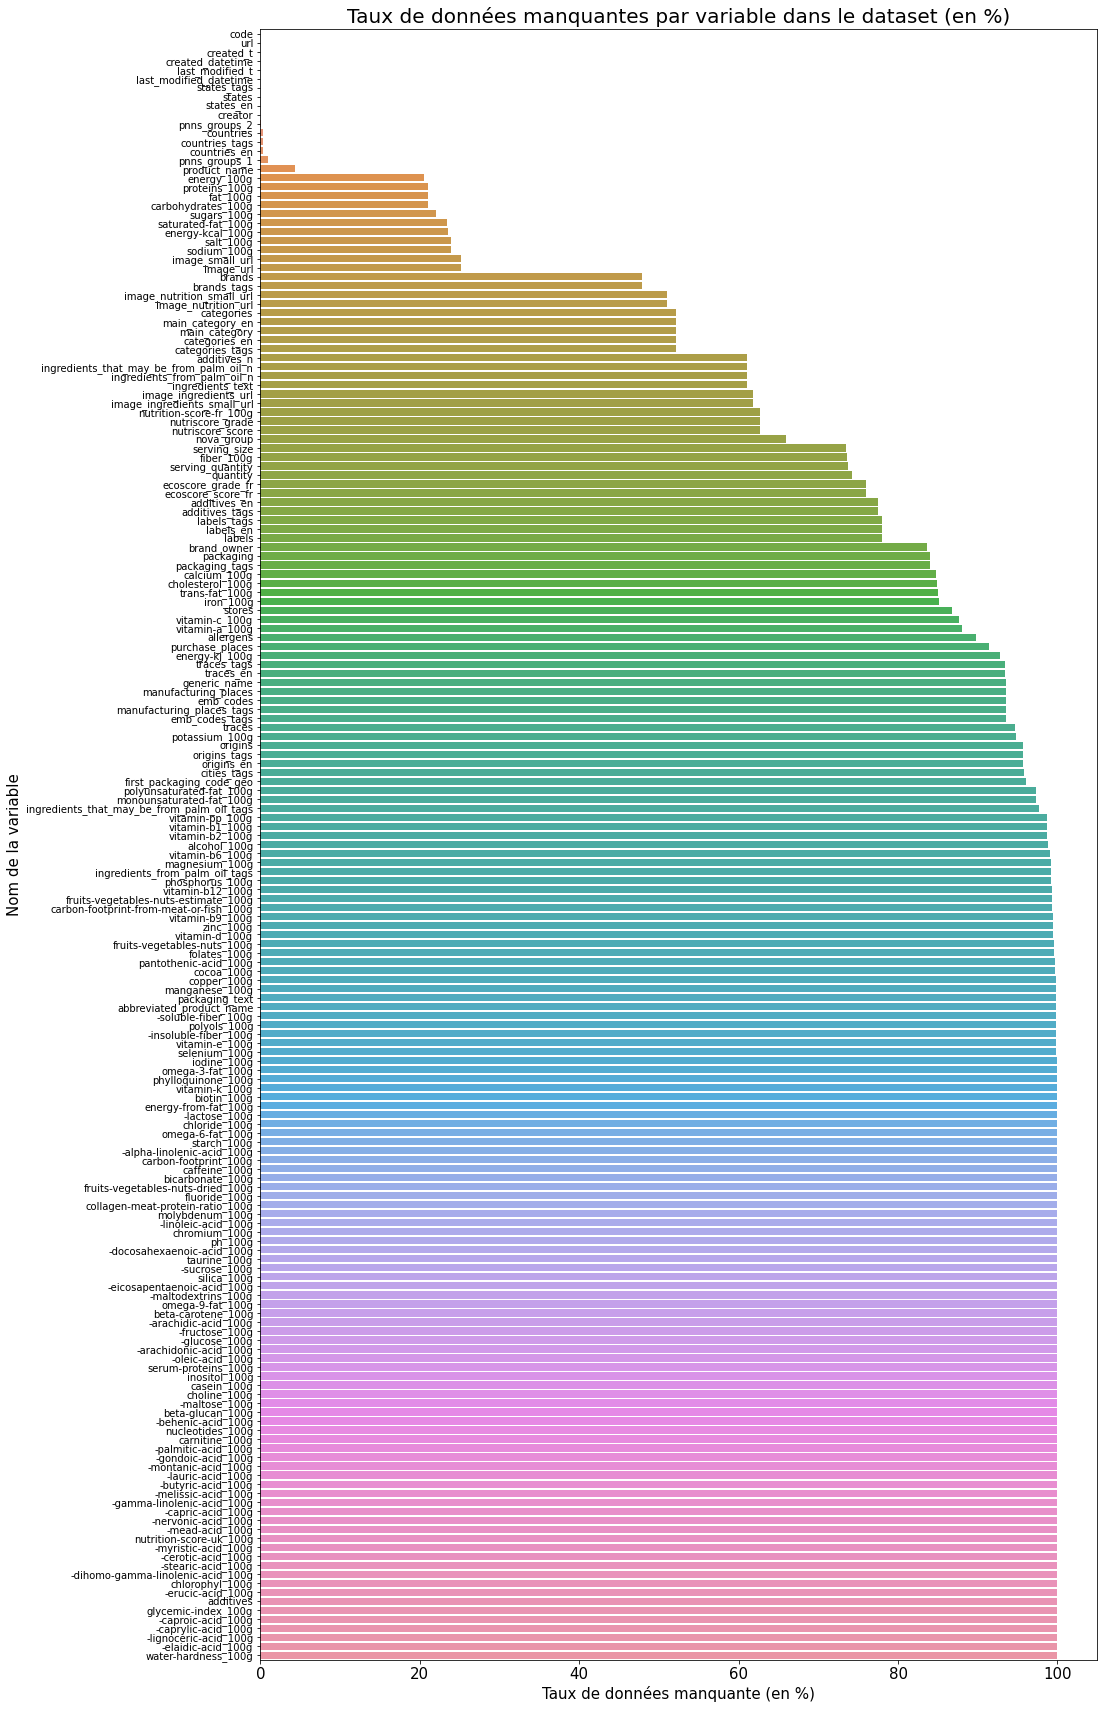

In [14]:
tauxNan = foodDataset.isna().sum().divide(foodDataset.shape[0]).multiply(100).sort_values(ascending = True)
    
plt.figure(figsize=(15, 30))
sns.barplot(x = tauxNan.values, y = tauxNan.index)
plt.xlabel('Taux de données manquante (en %)', fontsize = 15)
plt.ylabel('Nom de la variable', fontsize = 15)
plt.title('Taux de données manquantes par variable dans le dataset (en %)', fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.show()

Mais nous pouvons voir également que certaines variables même si elles n'atteignent pas les 100% de NaN, s'en approche beaucoup
nous allons réfléchir à ce que nous allons en faire.

In [15]:
tauxDeNan('water-hardness_100g')

99.99994357967763

Comme nous pouvions le penser ce n'est pas 100% de NaN mais bien 99,..% 
Pour la suite nous allons nous focaliser sur les variables qui nous aiderons pour notre application.

In [16]:
listeVariableGardées = ['product_name',
                        'countries',                        
                        'categories',
                        'additives_n',                        
                        'nutriscore_grade', 
                        'labels',
                        'energy_100g',
                        'energy-kj_100g',
                        'energy-kcal_100g',
                        'proteins_100g',
                        'carbohydrates_100g',
                        'sugars_100g',
                        'fat_100g',
                        'saturated-fat_100g',
                        'fiber_100g',
                        'sodium_100g',
                        'salt_100g',
                        'nutrition-score-fr_100g']

Nous allons supprimer les variables qui ne serviront pas:

In [17]:
for variable in listeVariable:
    if variable in listeVariableASupp:
        continue
    elif variable not in listeVariableGardées:
        foodDataset.drop(variable, axis = 1, inplace = True)

In [18]:
foodDataset.shape

(1772411, 18)

Séparons les variables *_100g qui auront le gramme comme unité et les autres variables, cela nous servira plus tard:

In [19]:
listeVariable100g = []
listeEnergy = []
listeAdditives = []
listeNutriscore = []
pattern100g = '100g'
patternEnergy = 'energy'
patternAdditives = 'additives'
patternNutriscore = 'nutri'
for variable in listeVariableGardées:
    if re.search(pattern100g, variable):
        listeVariable100g.append(variable)
    if re.search(patternEnergy, variable):
        listeEnergy.append(variable)
    if re.search(patternAdditives, variable):
        listeAdditives.append(variable)
    if re.search(patternNutriscore, variable):
        listeNutriscore.append(variable)

Séparons les variables numériques en fonction de leur type:

In [20]:
listeVariableNumerique = foodDataset.select_dtypes(include = ['int64', 'float64']).columns.tolist()
listeVariableNumeriqueInt = foodDataset.select_dtypes(include = ['int64']).columns.tolist()
listeVariableNumeriqueFloat = foodDataset.select_dtypes(include = ['float64']).columns.tolist()

Regardons quelques détails statistiques afin d'en apprendre un peu plus sur nos variables:

In [21]:
for variable in (listeVariableNumerique):
    print(variable, ':\n', foodDataset[variable].describe(),'\n')

additives_n :
 count    689247.000000
mean          2.044115
std           2.916568
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          49.000000
Name: additives_n, dtype: float64 

energy-kj_100g :
 count    1.282710e+05
mean     5.196466e+37
std      1.861111e+40
min      0.000000e+00
25%      4.000000e+02
50%      9.760000e+02
75%      1.616000e+03
max      6.665559e+42
Name: energy-kj_100g, dtype: float64 

energy-kcal_100g :
 count    1.354084e+06
mean     6.486221e+06
std      7.471575e+09
min      0.000000e+00
25%      1.010000e+02
50%      2.620000e+02
75%      4.000000e+02
max      8.693855e+12
Name: energy-kcal_100g, dtype: float64 

energy_100g :
 count    1.407610e+06
mean     4.735373e+36
std      5.618177e+39
min      0.000000e+00
25%      4.180000e+02
50%      1.088000e+03
75%      1.674000e+03
max      6.665559e+42
Name: energy_100g, dtype: float64 

fat_100g :
 count    1.399529e+06
mean     1.459145e+01
std      8.5

Nous pouvons voir qu'il y a des outliers, les variables ont pour certaines une valeurs supérieur à 100, ce qui est improbable
pour un maximum qui devrait être de 100 et pour les derniers les valeurs ne correspondent pas du tout à la valeur 
qui pourrait etre attendue. De même que pour les quantiles, nous voyons des aberrations pour d'autres statistiques, par exemple pour salt_100g nous avons un écart type de 136~, ce qui est improbable quand on sait que le maximum probable devrait être 100.
Regardons un exemple rapidement:

In [22]:
listeSup100 = foodDataset.loc[foodDataset['salt_100g'] > 100].index.tolist()

In [23]:
for i in listeSup100:
    print("la valeur numéro", i, "est absurde, pour 100g de sel nous avons une valeur de", foodDataset.iloc[i]['salt_100g'])

print("\nLa valeur maximale devrait être de 100 !")

la valeur numéro 2134 est absurde, pour 100g de sel nous avons une valeur de 104.1675
la valeur numéro 2774 est absurde, pour 100g de sel nous avons une valeur de 200.0
la valeur numéro 3234 est absurde, pour 100g de sel nous avons une valeur de 103.84625
la valeur numéro 4048 est absurde, pour 100g de sel nous avons une valeur de 104.0
la valeur numéro 4318 est absurde, pour 100g de sel nous avons une valeur de 505.0505050505
la valeur numéro 4522 est absurde, pour 100g de sel nous avons une valeur de 870.85678
la valeur numéro 6508 est absurde, pour 100g de sel nous avons une valeur de 1960.0
la valeur numéro 6844 est absurde, pour 100g de sel nous avons une valeur de 127.0
la valeur numéro 7154 est absurde, pour 100g de sel nous avons une valeur de 1880.0
la valeur numéro 7806 est absurde, pour 100g de sel nous avons une valeur de 3350.0
la valeur numéro 7937 est absurde, pour 100g de sel nous avons une valeur de 135.13525
la valeur numéro 9008 est absurde, pour 100g de sel nous avo

la valeur numéro 148422 est absurde, pour 100g de sel nous avons une valeur de 1250.0
la valeur numéro 148430 est absurde, pour 100g de sel nous avons une valeur de 1960.0
la valeur numéro 148627 est absurde, pour 100g de sel nous avons une valeur de 795.0
la valeur numéro 148764 est absurde, pour 100g de sel nous avons une valeur de 1620.0
la valeur numéro 149650 est absurde, pour 100g de sel nous avons une valeur de 760.0
la valeur numéro 149677 est absurde, pour 100g de sel nous avons une valeur de 431.8
la valeur numéro 150586 est absurde, pour 100g de sel nous avons une valeur de 222.0
la valeur numéro 150663 est absurde, pour 100g de sel nous avons une valeur de 292.0
la valeur numéro 150682 est absurde, pour 100g de sel nous avons une valeur de 300.0
la valeur numéro 150730 est absurde, pour 100g de sel nous avons une valeur de 104.16675
la valeur numéro 151055 est absurde, pour 100g de sel nous avons une valeur de 2000.0
la valeur numéro 153853 est absurde, pour 100g de sel nou

la valeur numéro 307726 est absurde, pour 100g de sel nous avons une valeur de 179.0
la valeur numéro 307932 est absurde, pour 100g de sel nous avons une valeur de 1790.0
la valeur numéro 310783 est absurde, pour 100g de sel nous avons une valeur de 165.0
la valeur numéro 312514 est absurde, pour 100g de sel nous avons une valeur de 833.0
la valeur numéro 320661 est absurde, pour 100g de sel nous avons une valeur de 104.1675
la valeur numéro 321621 est absurde, pour 100g de sel nous avons une valeur de 2120.0
la valeur numéro 322617 est absurde, pour 100g de sel nous avons une valeur de 222.0
la valeur numéro 322745 est absurde, pour 100g de sel nous avons une valeur de 1380.0
la valeur numéro 322762 est absurde, pour 100g de sel nous avons une valeur de 1640.0
la valeur numéro 323278 est absurde, pour 100g de sel nous avons une valeur de 104.1675
la valeur numéro 323280 est absurde, pour 100g de sel nous avons une valeur de 105.0
la valeur numéro 323382 est absurde, pour 100g de sel n

la valeur numéro 402275 est absurde, pour 100g de sel nous avons une valeur de 100.85324
la valeur numéro 402618 est absurde, pour 100g de sel nous avons une valeur de 381.0
la valeur numéro 403782 est absurde, pour 100g de sel nous avons une valeur de 300.0
la valeur numéro 404585 est absurde, pour 100g de sel nous avons une valeur de 109.22
la valeur numéro 407371 est absurde, pour 100g de sel nous avons une valeur de 181.42966
la valeur numéro 408144 est absurde, pour 100g de sel nous avons une valeur de 225.0
la valeur numéro 408597 est absurde, pour 100g de sel nous avons une valeur de 974.0
la valeur numéro 409718 est absurde, pour 100g de sel nous avons une valeur de 66700.0
la valeur numéro 409719 est absurde, pour 100g de sel nous avons une valeur de 39600.0
la valeur numéro 411235 est absurde, pour 100g de sel nous avons une valeur de 133.68528
la valeur numéro 411236 est absurde, pour 100g de sel nous avons une valeur de 133.68528
la valeur numéro 411317 est absurde, pour 10

la valeur numéro 1038341 est absurde, pour 100g de sel nous avons une valeur de 784.0
la valeur numéro 1085142 est absurde, pour 100g de sel nous avons une valeur de 120.0
la valeur numéro 1085388 est absurde, pour 100g de sel nous avons une valeur de 1430.0
la valeur numéro 1107020 est absurde, pour 100g de sel nous avons une valeur de 419.0
la valeur numéro 1107048 est absurde, pour 100g de sel nous avons une valeur de 1930.0
la valeur numéro 1107135 est absurde, pour 100g de sel nous avons une valeur de 1734.694
la valeur numéro 1107238 est absurde, pour 100g de sel nous avons une valeur de 1228.07025
la valeur numéro 1107447 est absurde, pour 100g de sel nous avons une valeur de 118.0
la valeur numéro 1107467 est absurde, pour 100g de sel nous avons une valeur de 1250.0
la valeur numéro 1107469 est absurde, pour 100g de sel nous avons une valeur de 1330.0
la valeur numéro 1107470 est absurde, pour 100g de sel nous avons une valeur de 1330.0
la valeur numéro 1107945 est absurde, pou

la valeur numéro 1348052 est absurde, pour 100g de sel nous avons une valeur de 457.0
la valeur numéro 1348053 est absurde, pour 100g de sel nous avons une valeur de 693.0
la valeur numéro 1348107 est absurde, pour 100g de sel nous avons une valeur de 264.414
la valeur numéro 1348110 est absurde, pour 100g de sel nous avons une valeur de 174.0
la valeur numéro 1348155 est absurde, pour 100g de sel nous avons une valeur de 111.0
la valeur numéro 1348162 est absurde, pour 100g de sel nous avons une valeur de 125.0
la valeur numéro 1348168 est absurde, pour 100g de sel nous avons une valeur de 123.0
la valeur numéro 1348199 est absurde, pour 100g de sel nous avons une valeur de 109.0
la valeur numéro 1348403 est absurde, pour 100g de sel nous avons une valeur de 109.0
la valeur numéro 1348432 est absurde, pour 100g de sel nous avons une valeur de 182.88
la valeur numéro 1349144 est absurde, pour 100g de sel nous avons une valeur de 600.0
la valeur numéro 1349205 est absurde, pour 100g de 

la valeur numéro 1741443 est absurde, pour 100g de sel nous avons une valeur de 420.0
la valeur numéro 1741633 est absurde, pour 100g de sel nous avons une valeur de 771.0
la valeur numéro 1741694 est absurde, pour 100g de sel nous avons une valeur de 610.1842
la valeur numéro 1743071 est absurde, pour 100g de sel nous avons une valeur de 124.46
la valeur numéro 1743666 est absurde, pour 100g de sel nous avons une valeur de 127.0
la valeur numéro 1743787 est absurde, pour 100g de sel nous avons une valeur de 79007.0
la valeur numéro 1744316 est absurde, pour 100g de sel nous avons une valeur de 125.0
la valeur numéro 1749085 est absurde, pour 100g de sel nous avons une valeur de 2050.0
la valeur numéro 1751179 est absurde, pour 100g de sel nous avons une valeur de 129.0
la valeur numéro 1751971 est absurde, pour 100g de sel nous avons une valeur de 266.7
la valeur numéro 1751993 est absurde, pour 100g de sel nous avons une valeur de 417.0
la valeur numéro 1755064 est absurde, pour 100g

Comme nous pouvons le voir il y a énormément d'outliers, qui sont aberrants et non atypique (pour les variable *_100g tout du moins).
Prenons l'exemple du sel, que nous généraliserons par la suite:

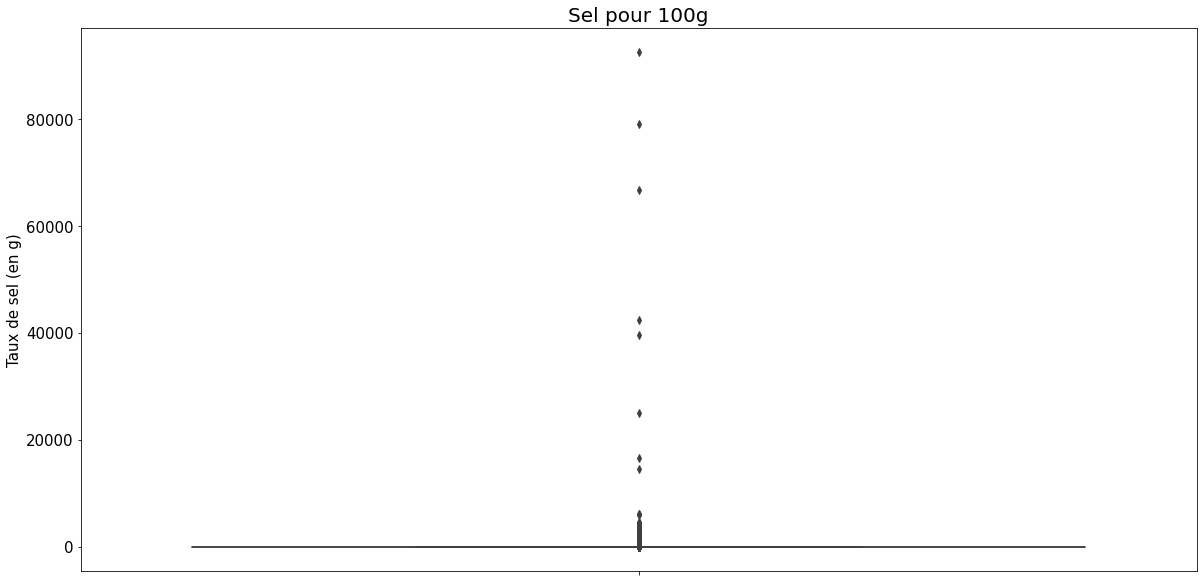

In [24]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = foodDataset['salt_100g'])
plt.title('Sel pour 100g', fontsize = 20)
plt.ylabel('Taux de sel (en g)', fontsize = 15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

Nous pouvons voir les valeurs qui sont aberrantes, on ne peut avoir plus de 100g de sel pour 100g de produit, regardons
la distribution de la variable salt_100g.

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


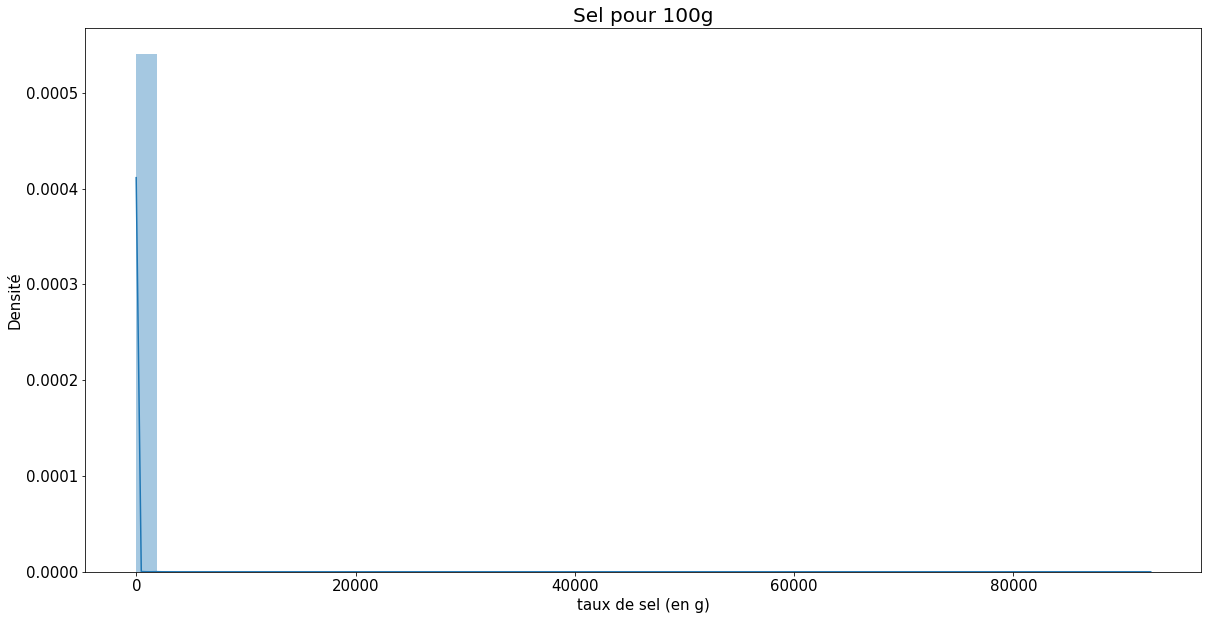

In [25]:
plt.figure(figsize = (20, 10))
sns.distplot(foodDataset['salt_100g'].dropna())
plt.title('Sel pour 100g', fontsize = 20)
plt.xlabel('taux de sel (en g)', fontsize = 15)
plt.ylabel('Densité', fontsize = 15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)

Pour nettoyer les valeurs aberrantes nous allons voir ce que donne les écarts interquartiles, nous aurions pu utiliser la distance
à la moyenne ou à la médianne, mais dans les 2 cas les résultats seront moins bon dans l'ensemble.
La moyenne est trop sensible aux outliers et la médianne passerait à côté de certaines valeurs qui seraient bonnes.

Dans un premier temps récupérons les valeurs nécessaire, à savoir Q1, Q3 et les bornes inf et sup:

In [26]:
Q1_salt = foodDataset['salt_100g'].quantile(0.25)
Q3_salt = foodDataset['salt_100g'].quantile(0.75)
borneInf_salt = Q1_salt - 1.5*(Q3_salt-Q1_salt)
borneSup_salt = Q3_salt + 1.5*(Q3_salt-Q1_salt)

print(Q1_salt, ' ', Q3_salt, ' ', borneInf_salt, ' ', borneSup_salt)

0.07   1.4   -1.9249999999999996   3.3949999999999996


Nous pouvons voir que cette méthode va supprimer les outliers, ce qui est bon pour nous, mais nous pouvons également voir
que la borne sup n'est seulement que de 3.4~ ce qui veut dire que la valeur de nombreux produit qui seraient bonne va être
remplacée par NaN. Nous devons donc modifier les bornes. De plus pour les variables *_100g nous supprimerons les valeurs
supérieures à 100.

In [27]:
Q1_Salt_CentileExtreme = foodDataset['salt_100g'].quantile(0.001)
Q3_Salt_CentileExtreme = foodDataset['salt_100g'].quantile(0.999)
print('Q1:', Q1_Salt_CentileExtreme, ' Q3:', Q3_Salt_CentileExtreme)

Q1: 0.0  Q3: 98.4


Nous pouvons voir que même en prenant des centiles vraiment élevés, nous ne capterions pas tous les produits, car exemple 
le paquet de sel qui contient 100g de sel ne serait pas pris, ce qui posera problème également. Et en prenant des bornes inf et sup comme on a pu faire avant nous aurions des valeurs supérieures à 200 et inférieur à -147, ce qui posera problème une fois de plus. 
Nous devons chercher une autre méthode.
Pour les variables *_100g nous remplacerons les valeurs supérieur à 100 et les valeurs inférieurs à 0 par la valeur de la médiane (car plus robuste aux outliers comparé à la moyenne), nous pouvons voir que les quantiles seuls ne seront pas un bon choix pour nous dans notre cas (les variables *_100g, hormis les variables enregy-*_100g).

Essayons de remplacer les valeurs aberrantes et les valeurs manquantes avec l'exemple de salt_100g:

In [28]:
tauxDeNan_Affichage('salt_100g')

La variable salt_100g contient 23.85908234602471 % de valeur NaN


In [29]:
listeOutliers_salt = foodDataset.loc[foodDataset['salt_100g'] > 100.0].index.tolist()
listeOutliers_salt.append(foodDataset.loc[foodDataset['salt_100g'] < 0.0].index.tolist())

In [30]:
len(listeOutliers_salt)

859

In [31]:
for i in listeOutliers_salt:            
    foodDataset.loc[i, 'salt_100g'] = np.nan
moyenneSalt = foodDataset['salt_100g'].mean()
foodDataset['salt_100g'] = foodDataset['salt_100g'].replace(np.nan, moyenneSalt)

In [32]:
tauxDeNan_Affichage('salt_100g')

La variable salt_100g contient 0.0 % de valeur NaN


Nous pouvons maintenant faire de même pour toute nos variables, en faisant attention au type de la variable et à sa distribution.

In [33]:
listeNumeriqueAvantNettoyage = []
for variable in foodDataset.columns:
    if (foodDataset[variable].dtypes == 'float64') and tauxDeNan(variable) > 0:
        listeNumeriqueAvantNettoyage.append(variable)

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


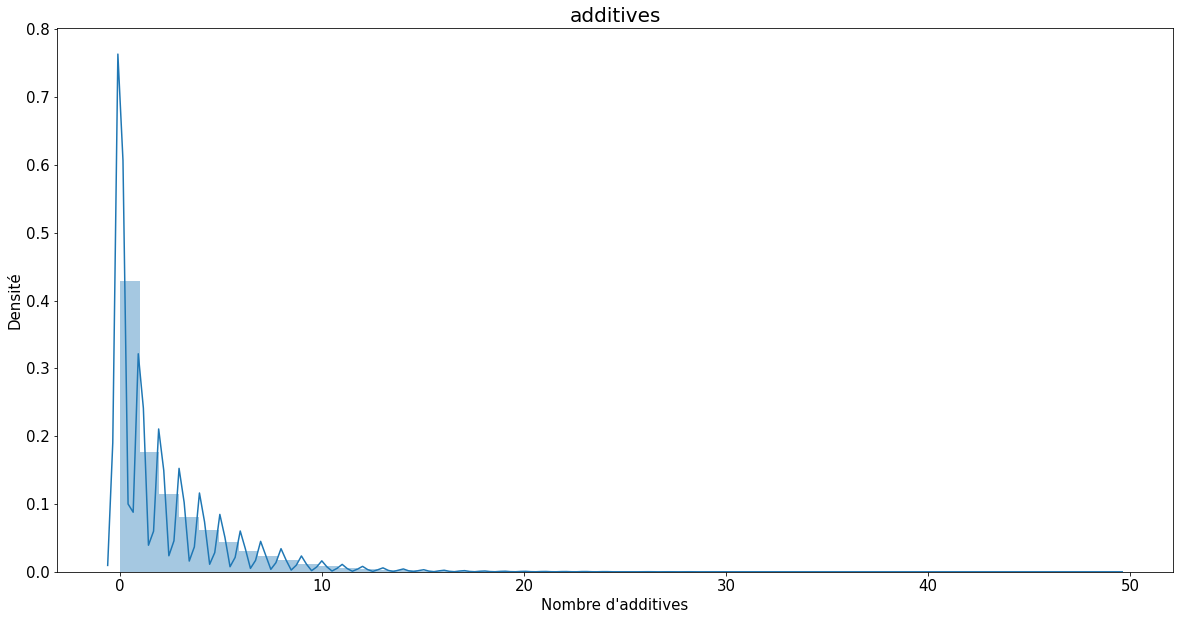

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


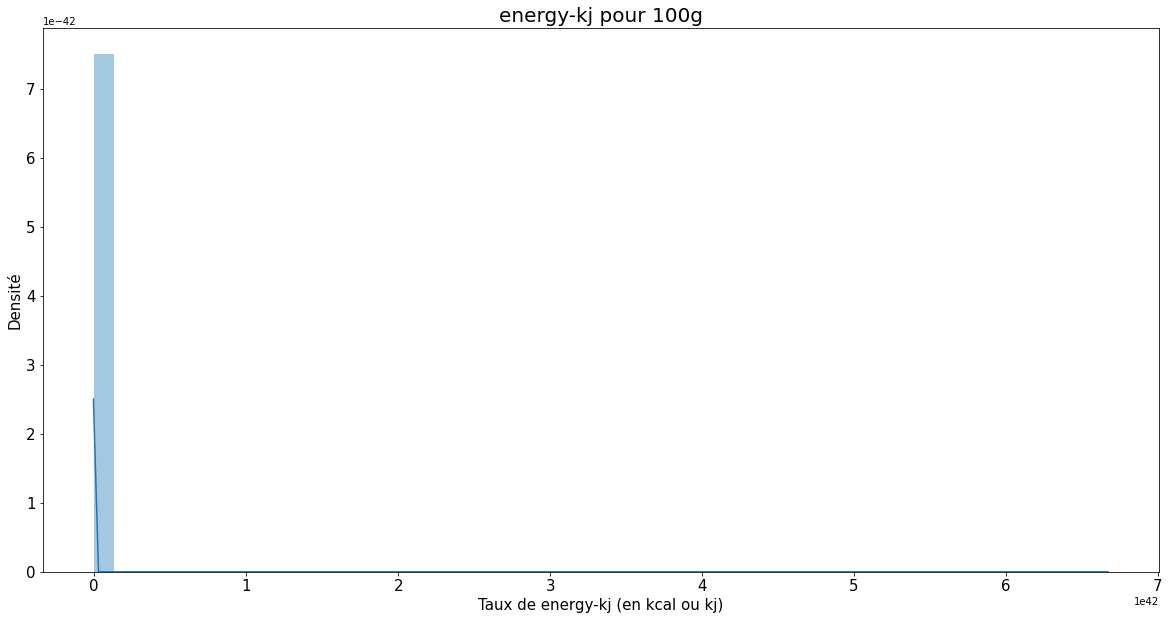

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


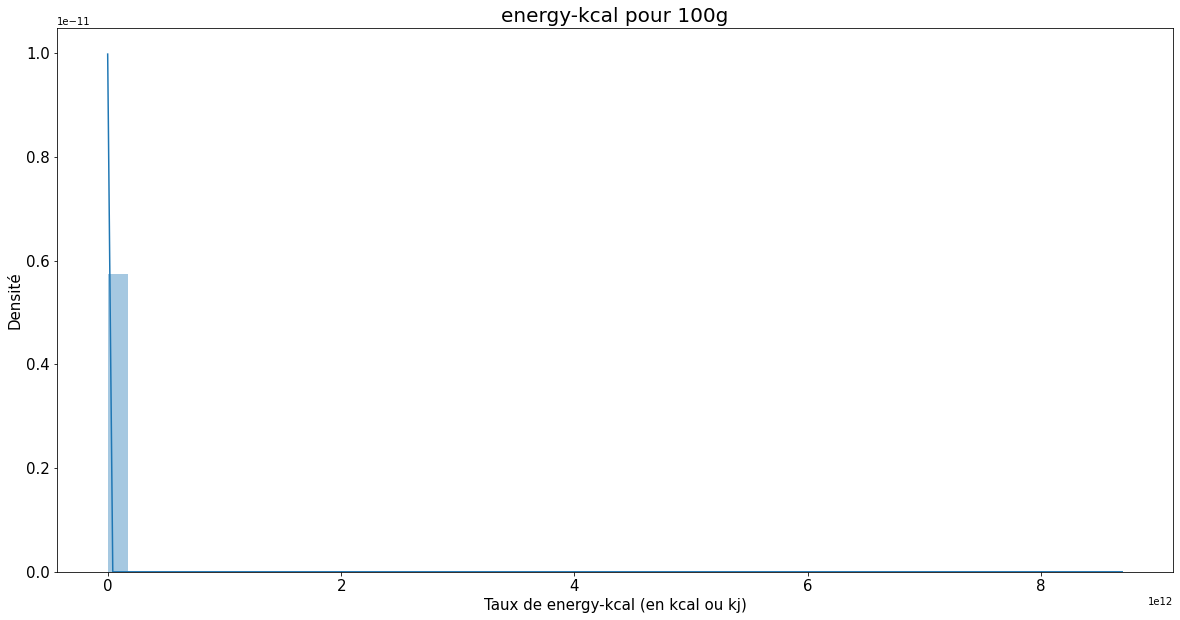

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


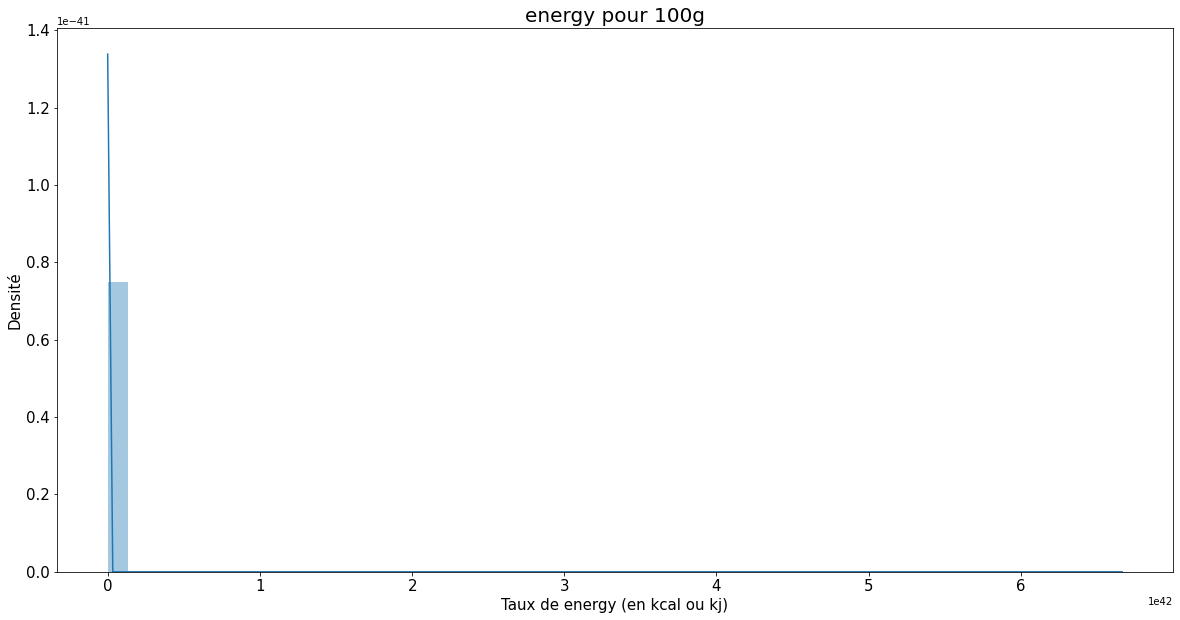

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


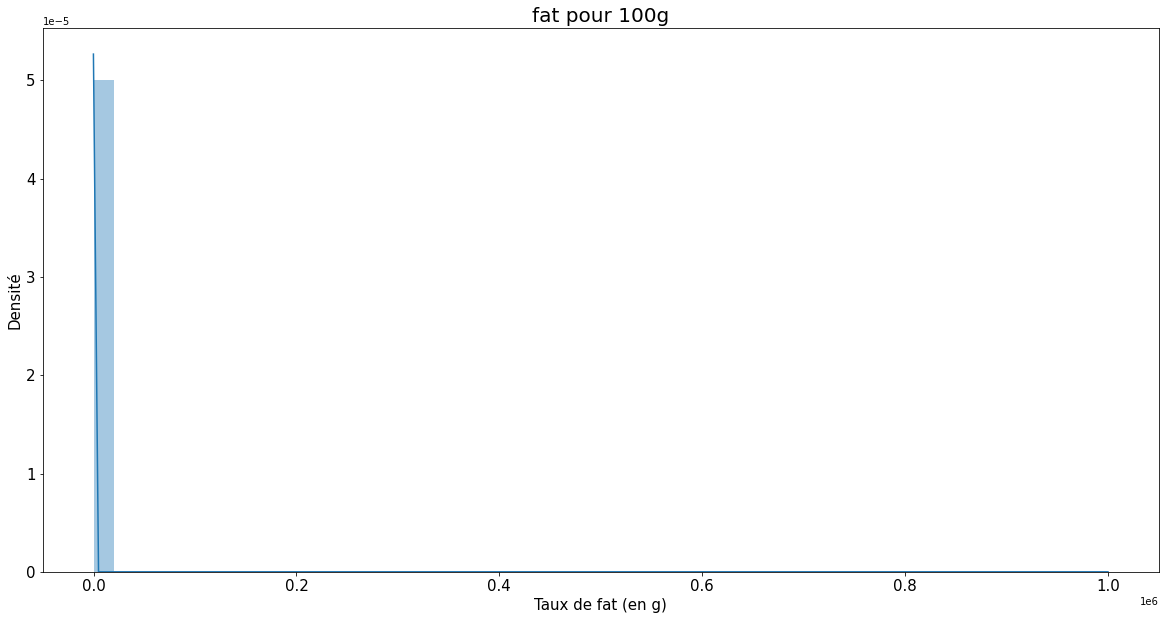

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


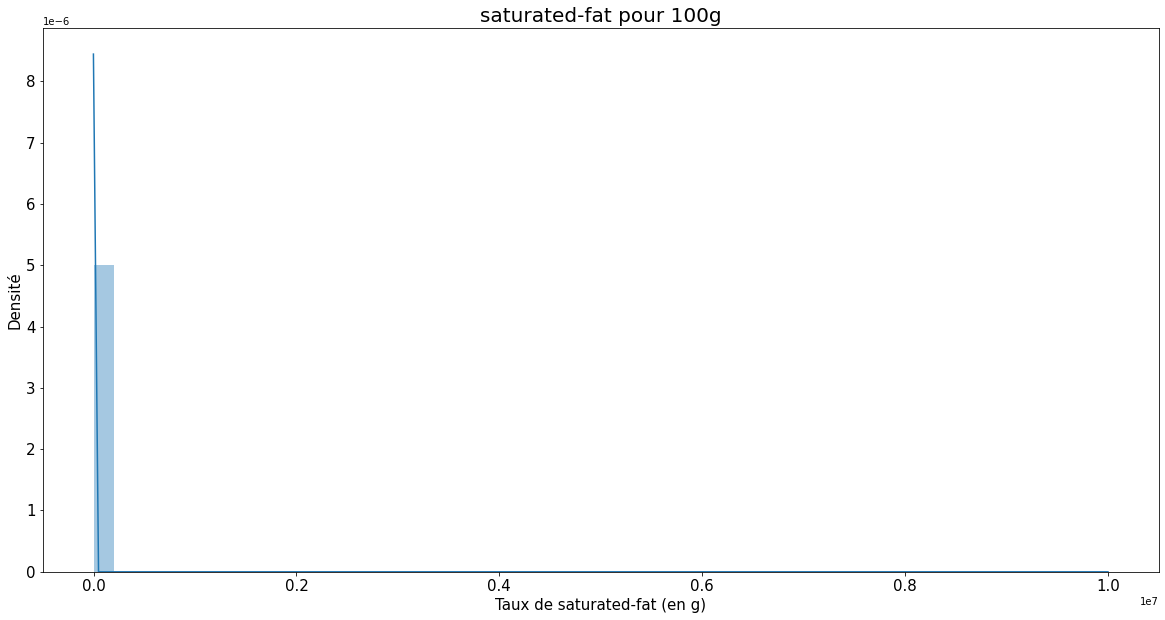

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


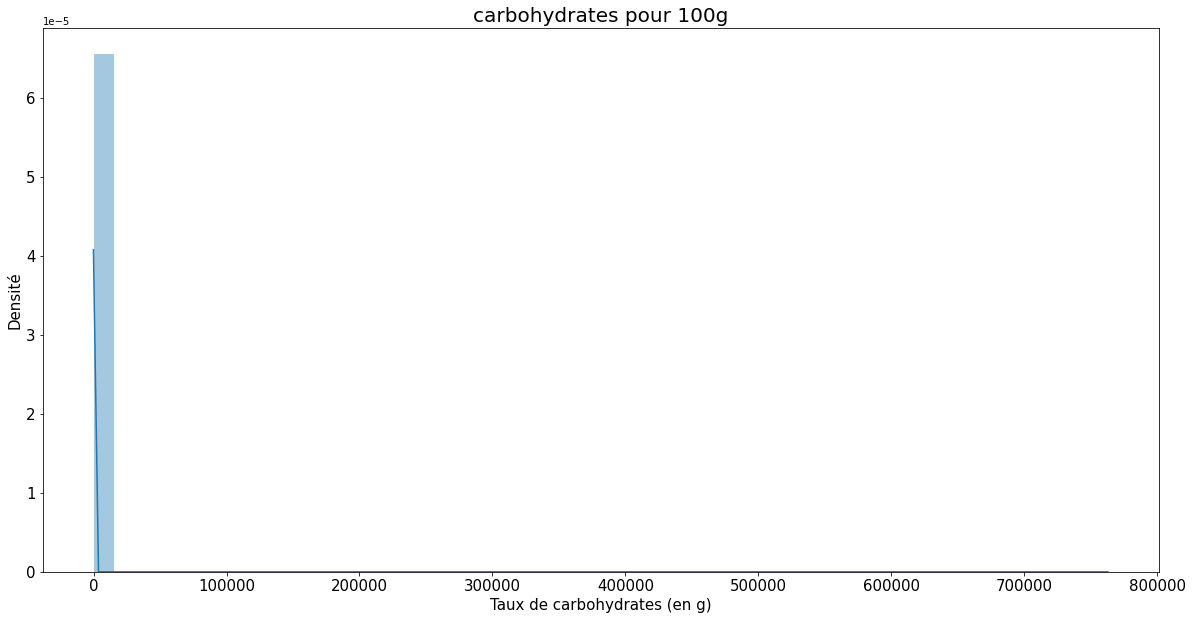

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


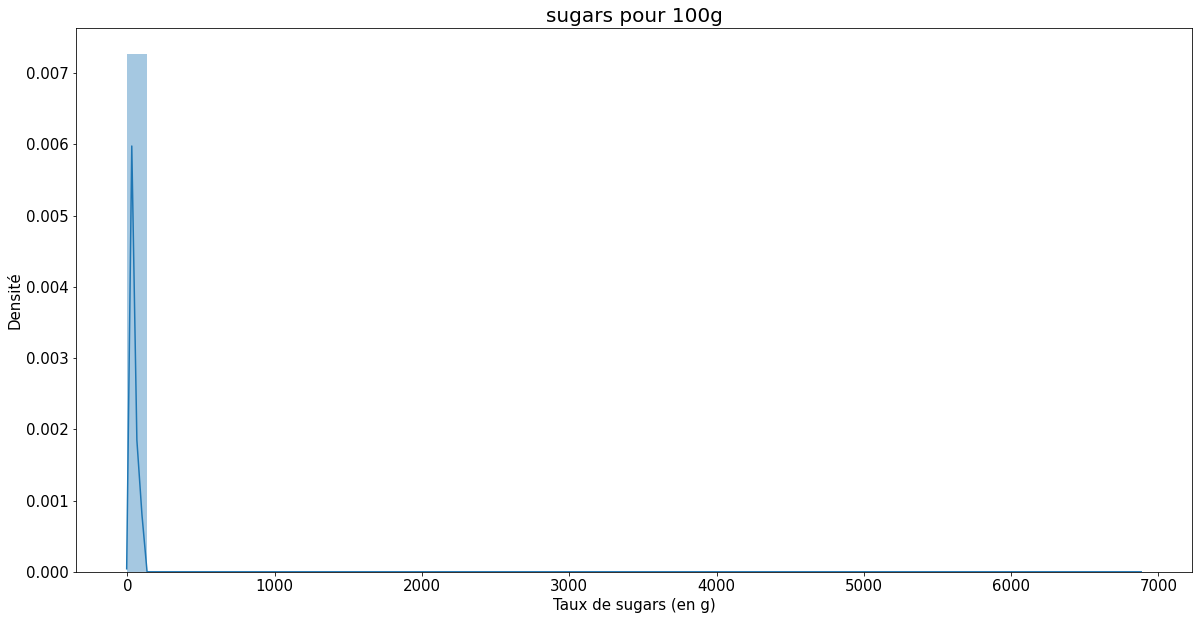

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


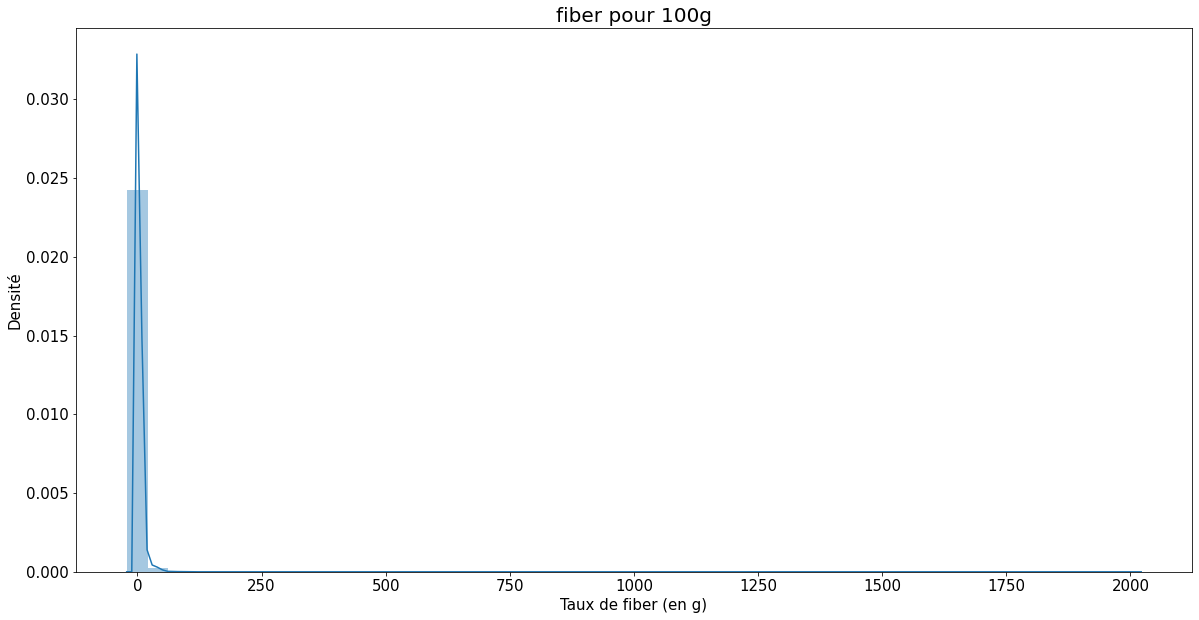

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


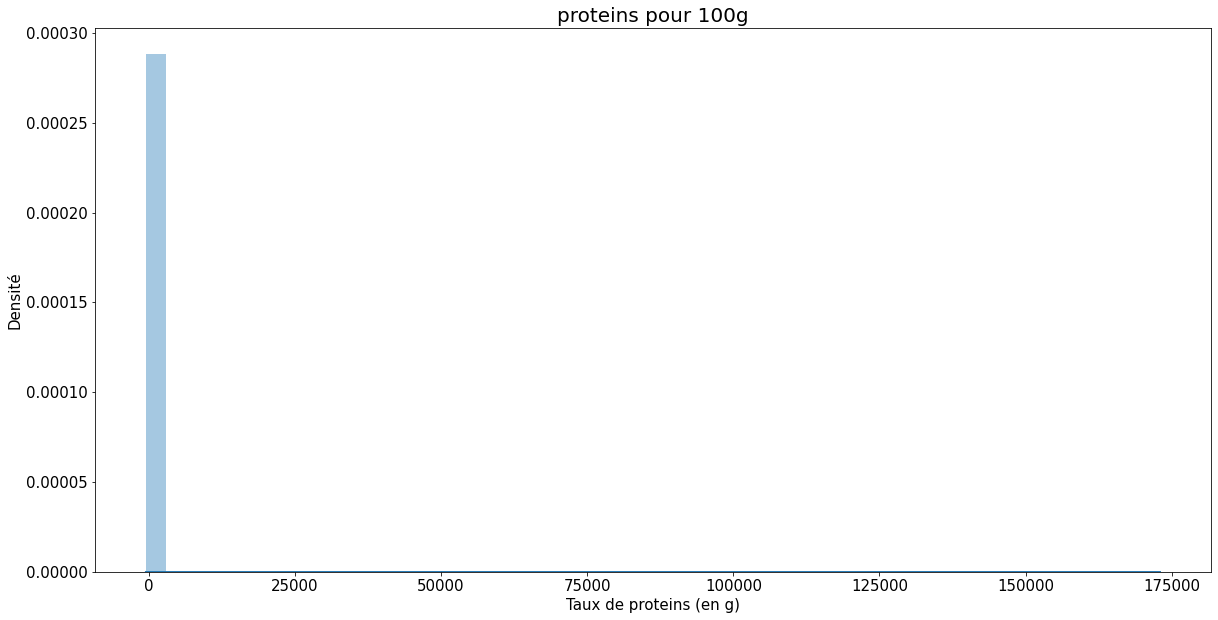

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


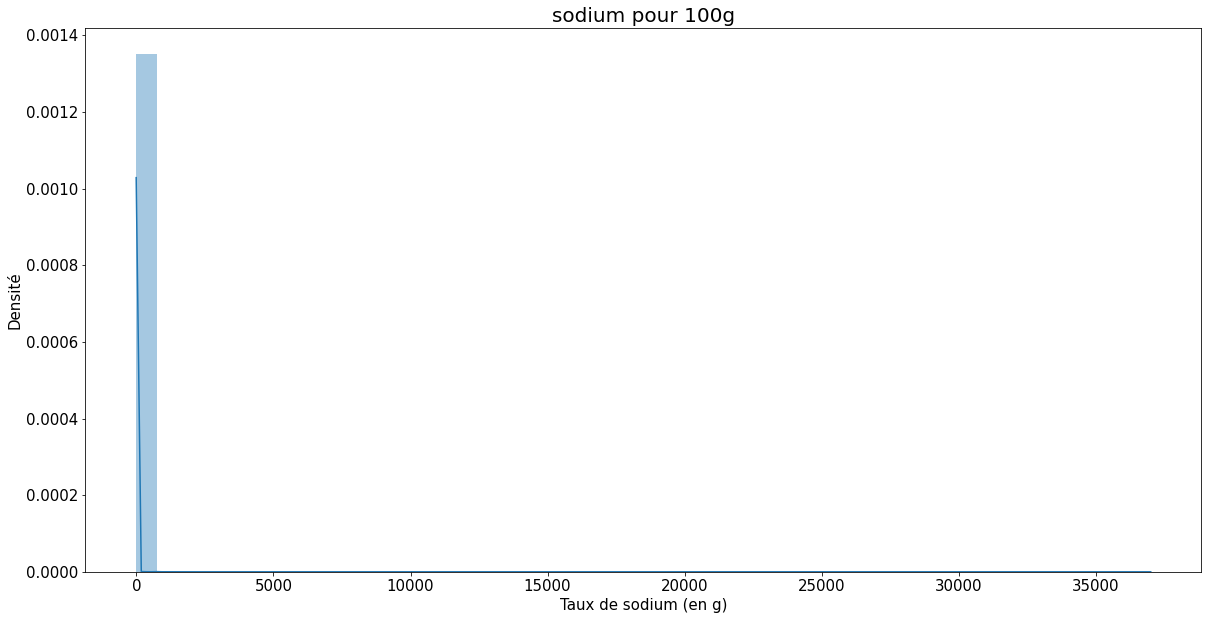

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


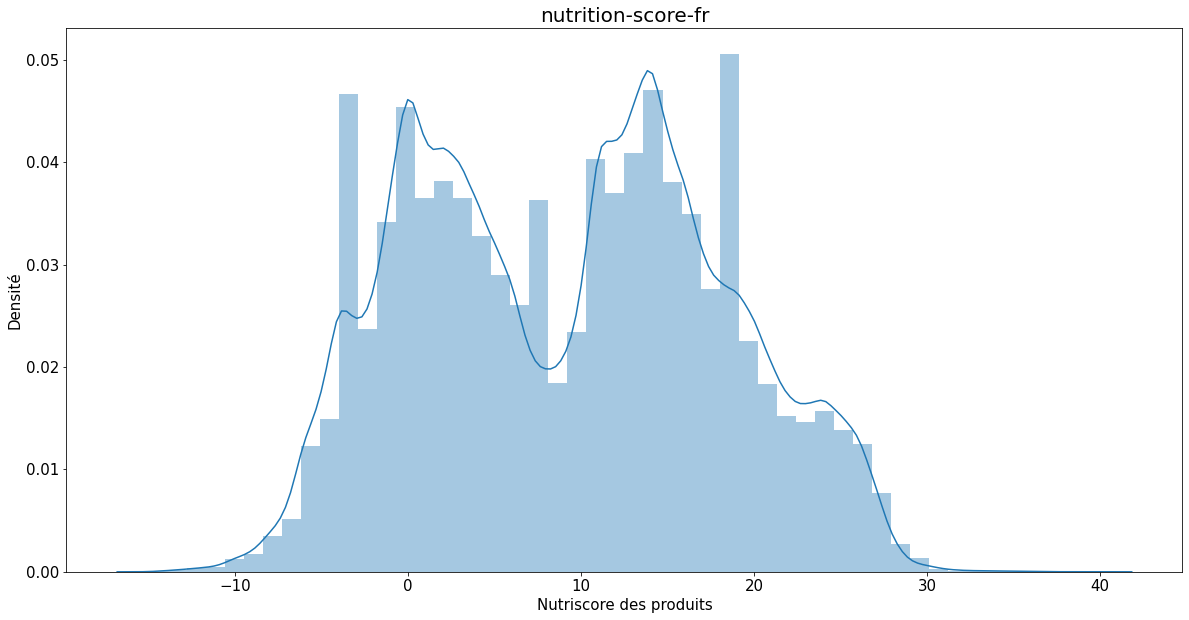

In [34]:
for variable in listeNumeriqueAvantNettoyage:    
    
    if variable in listeVariable100g and variable not in listeEnergy and variable not in listeNutriscore:        
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodDataset[variable])  
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en g)", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()  
        
    if variable in listeEnergy:
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodDataset[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0]+ " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en kcal ou kj)", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeAdditives:
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodDataset[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nombre d'additives", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeNutriscore:
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodDataset[variable])   
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nutriscore des produits", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show() 

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


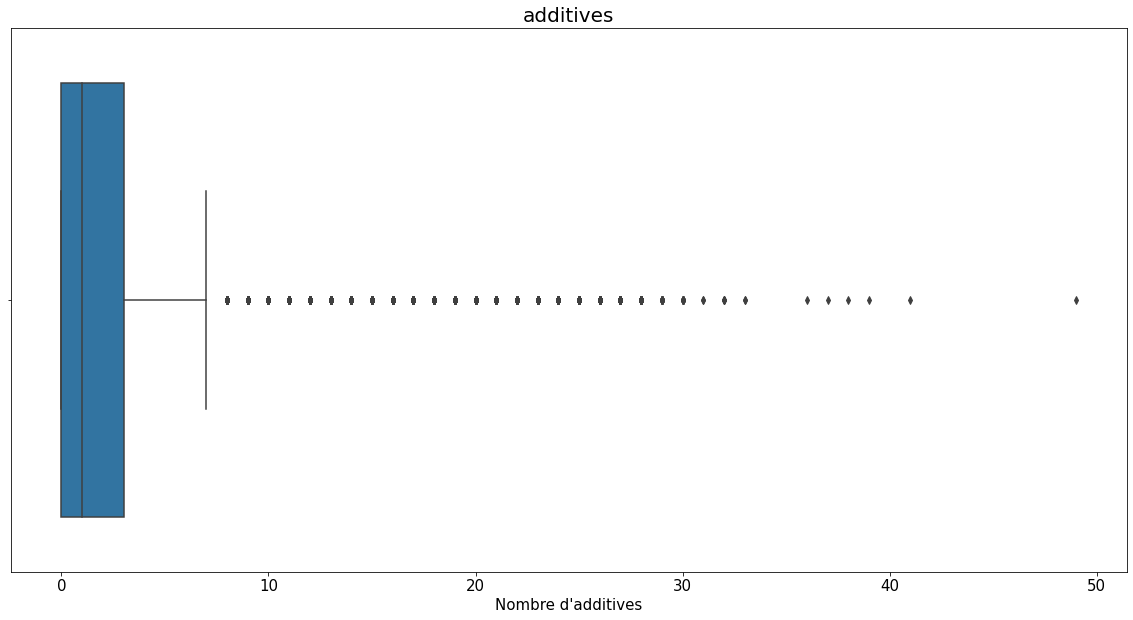

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


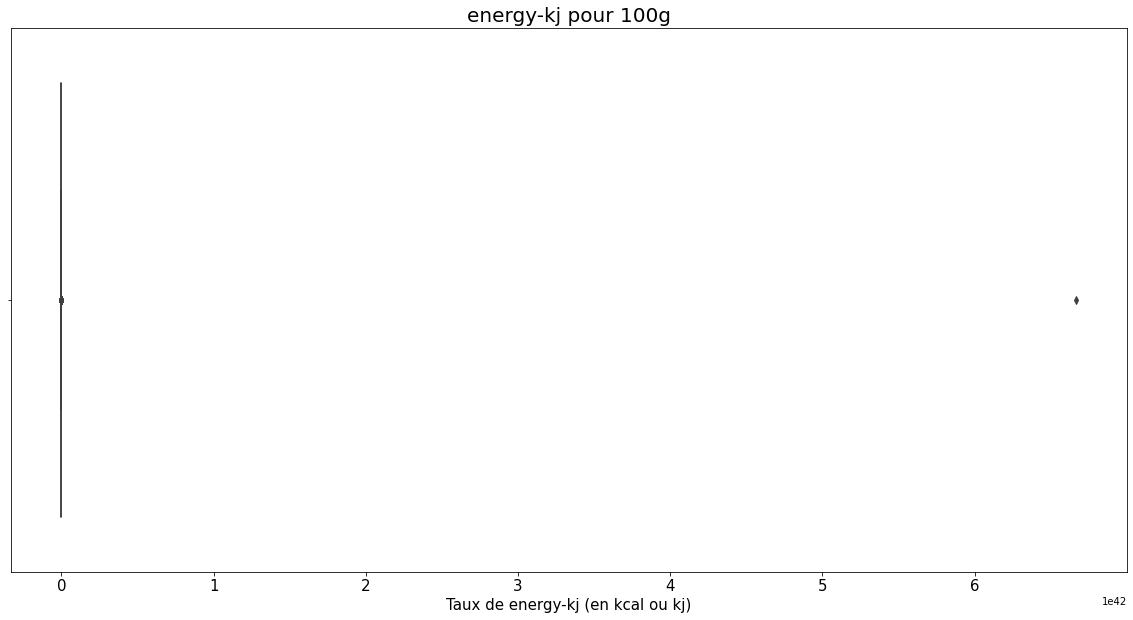

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


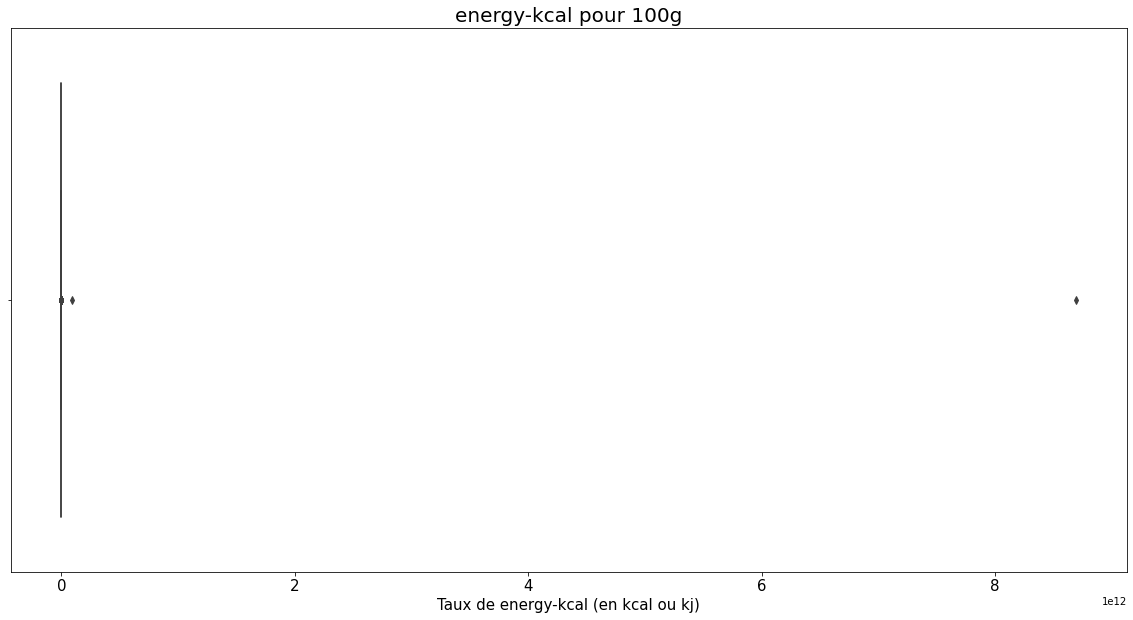

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


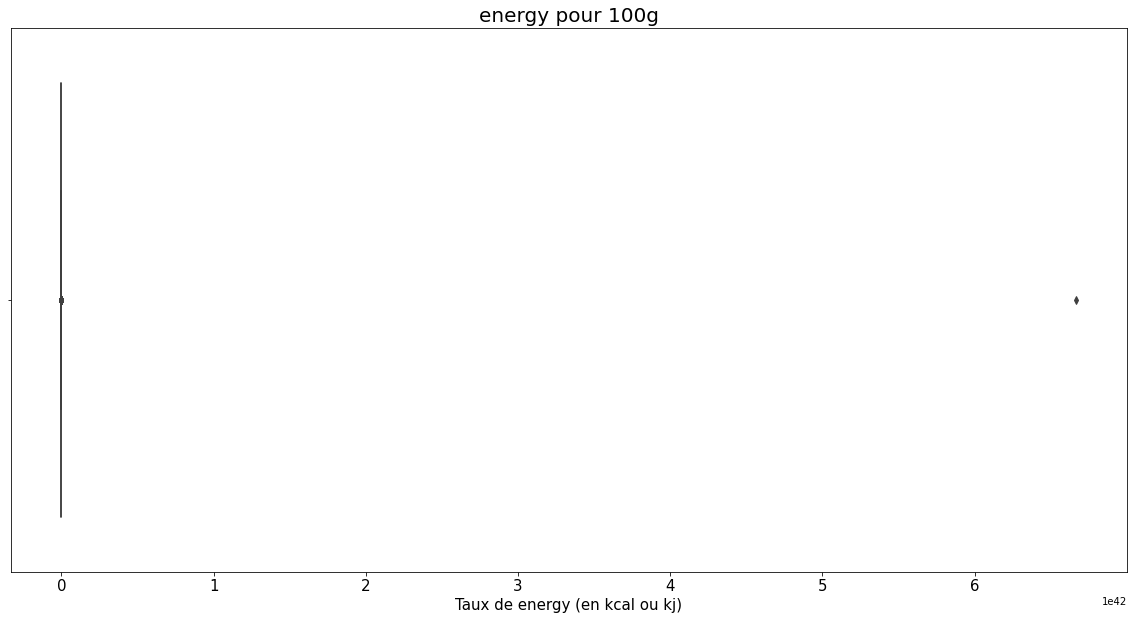

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


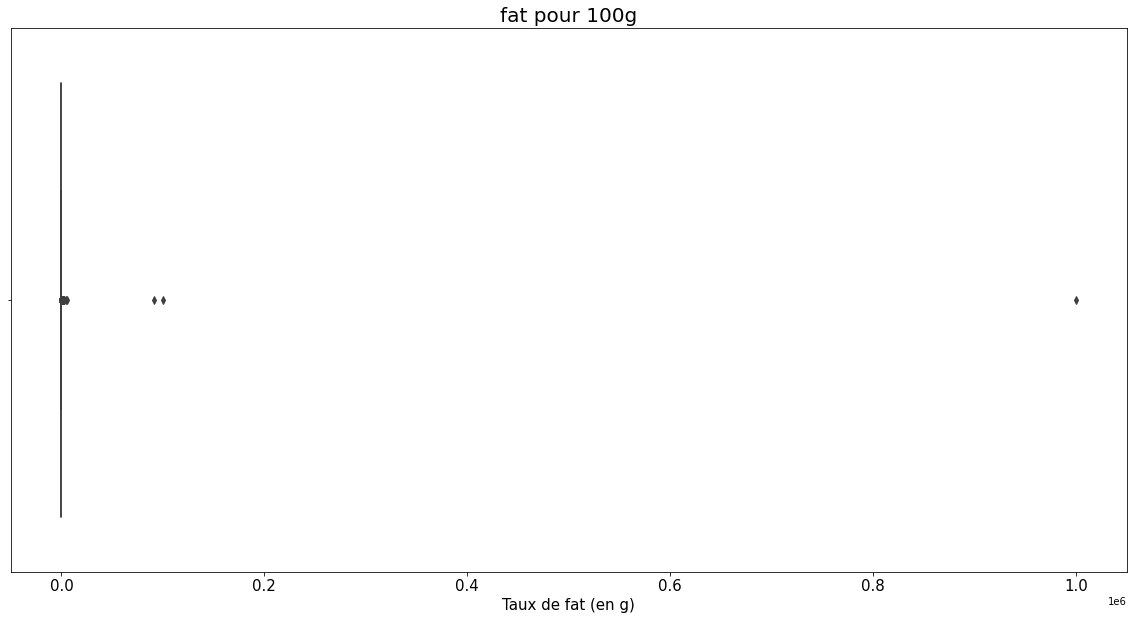

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


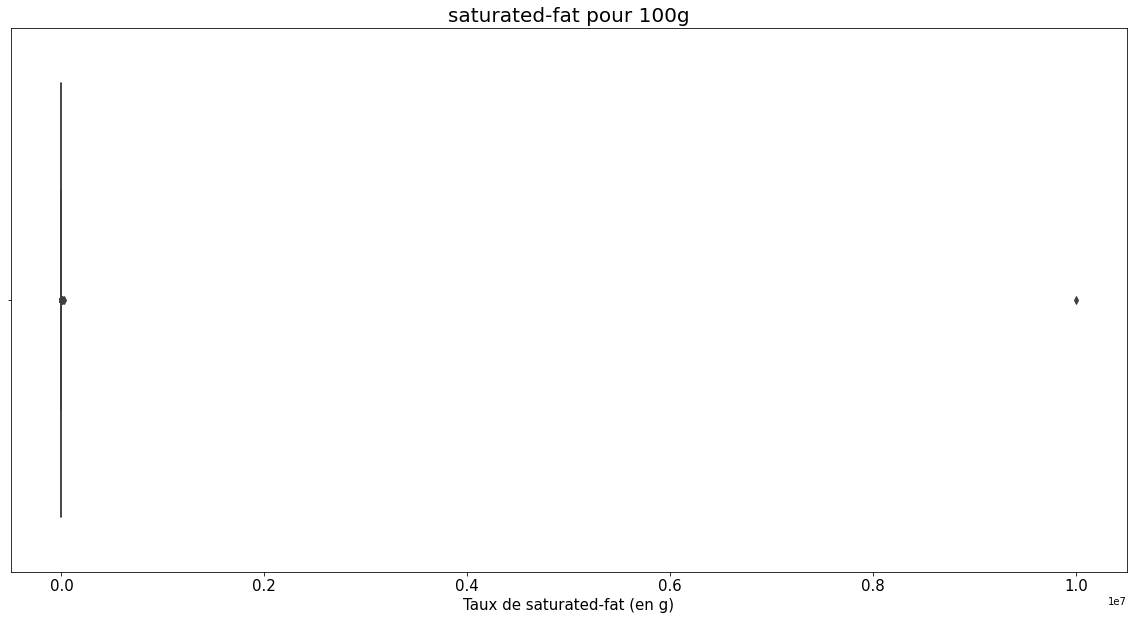

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


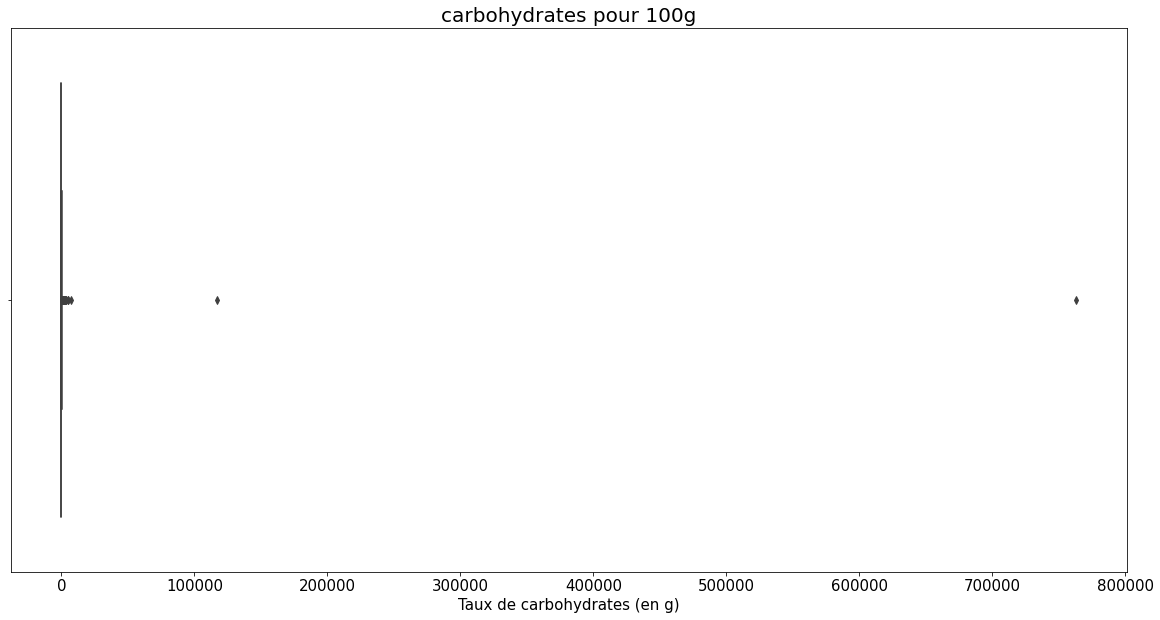

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


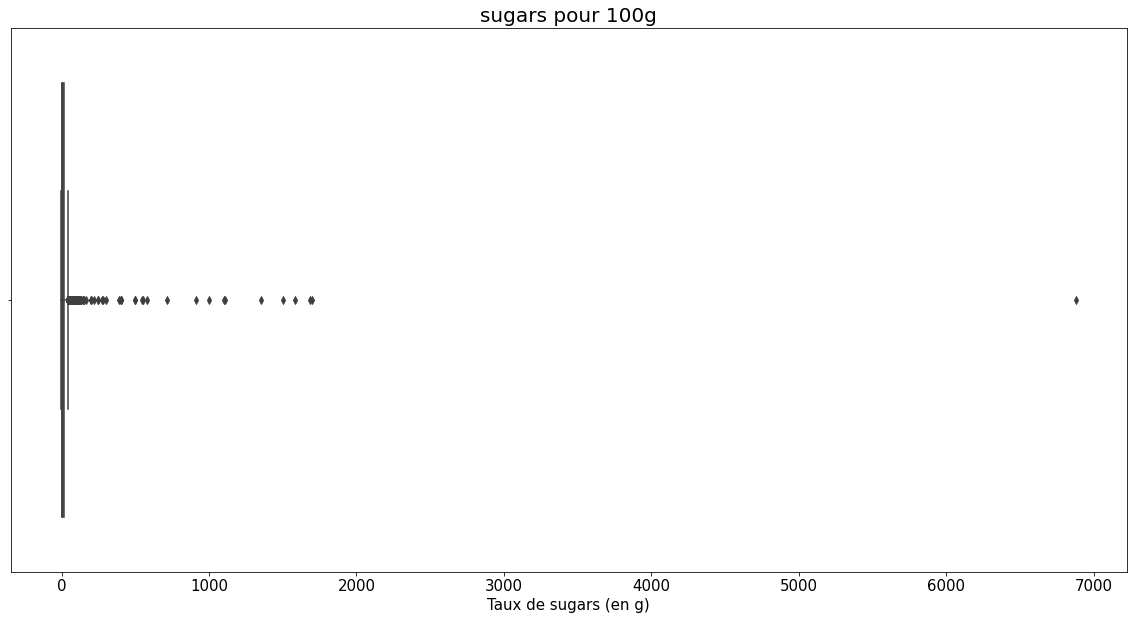

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


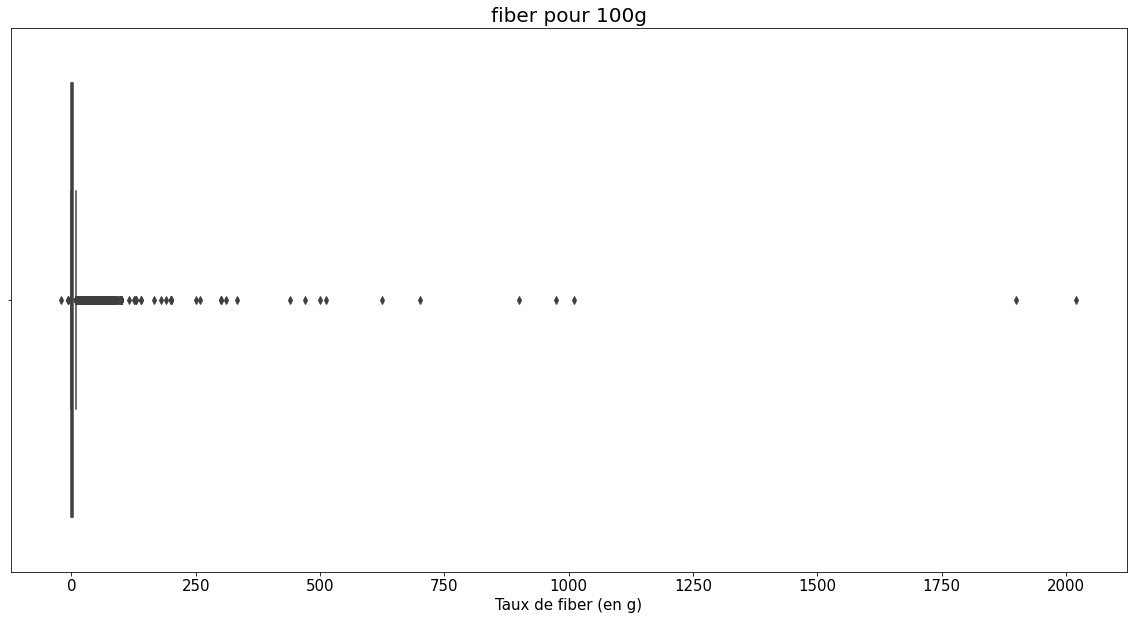

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


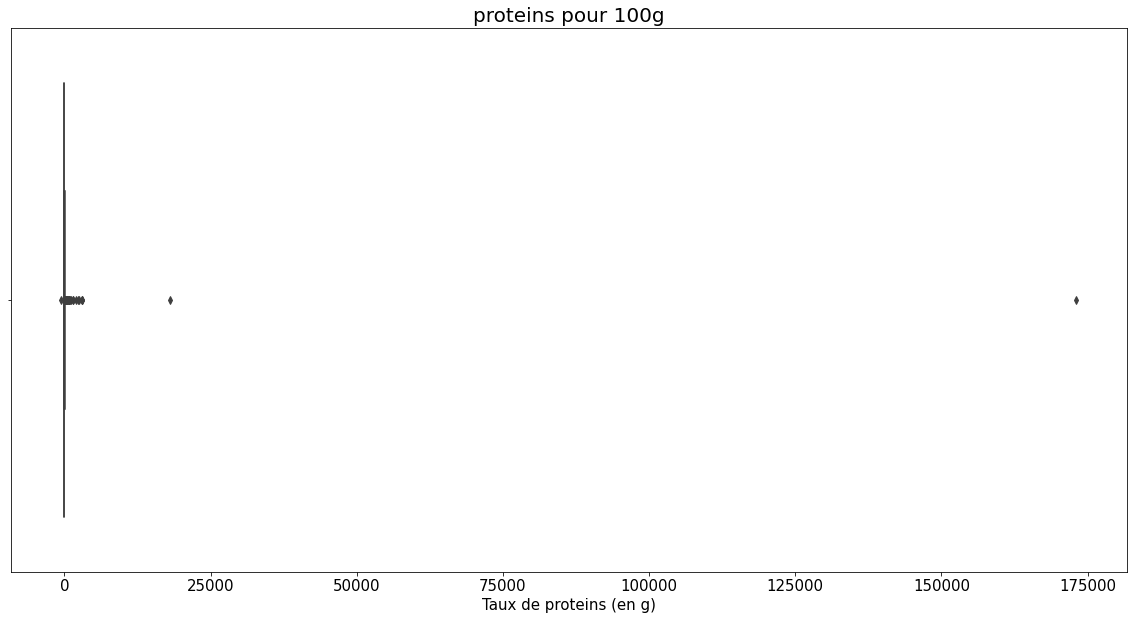

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


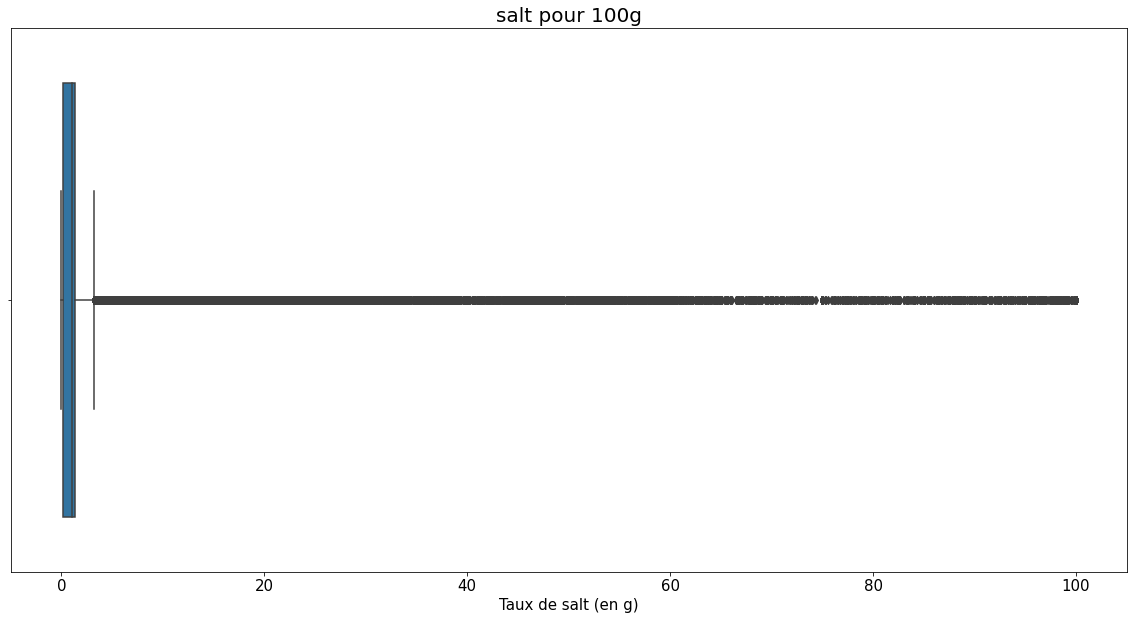

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


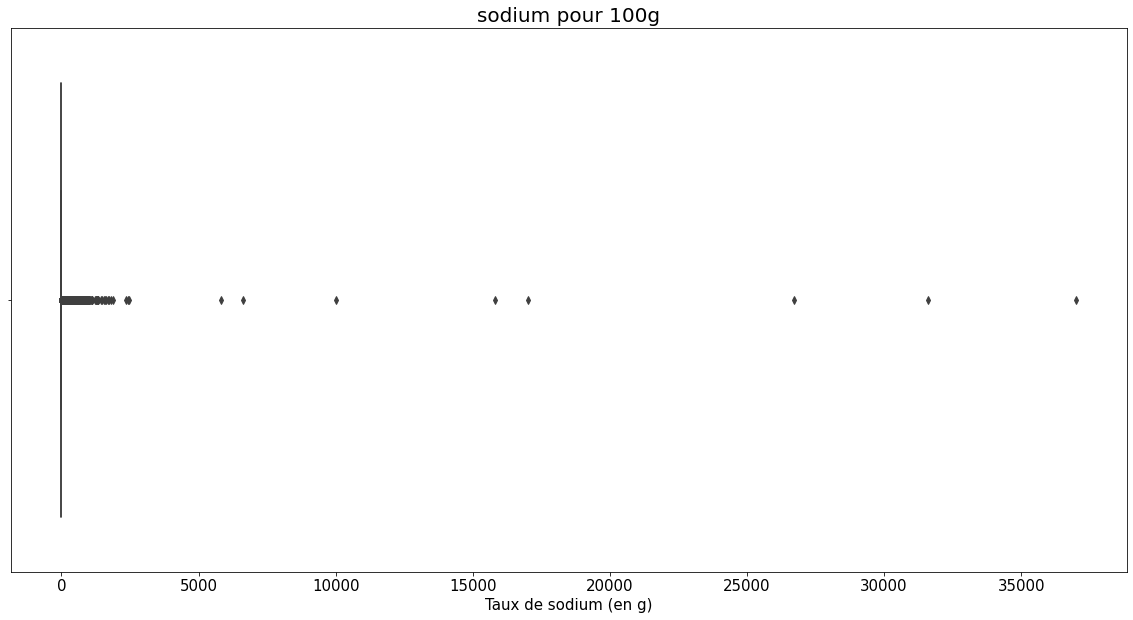

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


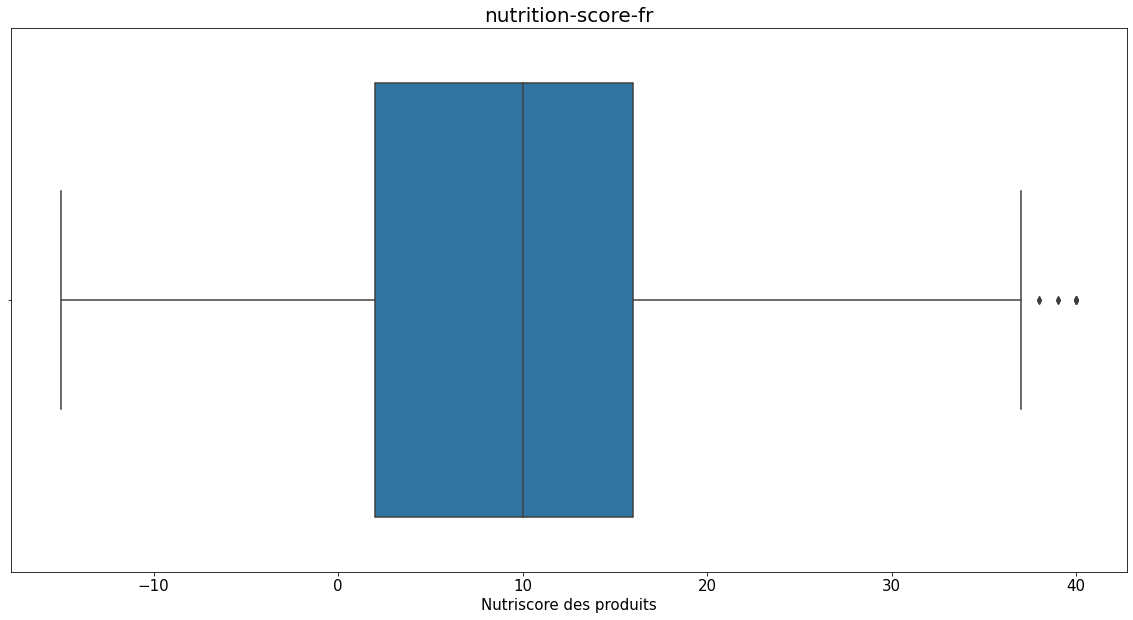

In [35]:
for variable in listeVariableNumerique:
    if variable in listeVariable100g and variable not in listeEnergy and variable not in listeNutriscore:        
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodDataset[variable])  
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en g)", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()  
        
    if variable in listeEnergy:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodDataset[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en kcal ou kj)", fontsize = 15)        
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeAdditives:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodDataset[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nombre d'additives", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeNutriscore:
        plt.figure(figsize = (20, 10))    
        sns.boxplot(foodDataset[variable])   
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nutriscore des produits", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show() 

Comme nous pouvons nous y attendre, comme pour le sel nos variables vont avoir des valeurs aberrantes.
Nous pouvons voir également que nos variables ont pour certaines une distribution multimodale et pour d'autre unimodal, il va donc falloir s'adapter au mieux pour chaque variables.
Comme nous avons pu faire pour le sel, nous allons remplacer les valeurs aberrantes et les valeurs manquantes pour toutes nos variables numériques.

In [36]:
listeMediane = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'salt_100g']
listeMoyenne = ['additives_n', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'proteins_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'ecoscore_score_fr']

In [37]:
import datetime
def nettoyageOutliers(variable):
    Q1 = foodDataset[variable].quantile(0.05)
    Q3 = foodDataset[variable].quantile(0.95)
    borneInf = Q1 - 1.5*(Q3 - Q1)
    borneSup = Q3 + 1.5*(Q3 - Q1)
    
    #medianeVariable = foodDataset[variable].median()
    
    listeOutliers_variable100 = []
    listeOutliers_variable = []
    listeVariableRemplacée = []
    
    if variable in listeVariable100g and variable not in listeEnergy and variable in listeMediane and variable not in listeVariableRemplacée:
        listeOutliers_variable100 = foodDataset.loc[foodDataset[variable] > 100].index.tolist()
        listeOutliers_variable100.append(foodDataset.loc[foodDataset[variable] < 0].index.tolist())
        listeVariableRemplacée.append(variable)
        print("Remplacement des valeurs aberrantes et manquantes pour la variable: ", variable)       
        for i in listeOutliers_variable100:            
            foodDataset.loc[i, variable] = np.nan
        medianeVariable = foodDataset[variable].median()
        foodDataset[variable] = foodDataset[variable].replace(np.nan, medianeVariable)
            
            
            
    if variable in listeVariable100g and variable not in listeEnergy and variable in listeMoyenne and variable not in listeVariableRemplacée:
        listeOutliers_variable100 = foodDataset.loc[foodDataset[variable] > 100].index.tolist()
        listeOutliers_variable100.append(foodDataset.loc[foodDataset[variable] < 0].index.tolist())                 
        listeVariableRemplacée.append(variable)
        print("Remplacement des valeurs aberrantes et manquantes pour la variable: ", variable)          
        for i in listeOutliers_variable100:            
            foodDataset.loc[i, variable] = np.nan
        moyenneVariable = foodDataset[variable].mean()
        foodDataset[variable] = foodDataset[variable].replace(np.nan, moyenneVariable)
            
            
            
    if variable in listeEnergy or variable in listeMoyenne and variable not in listeVariableRemplacée:        
        listeOutliers_variable = foodDataset.loc[foodDataset[variable] > borneSup].index.tolist()
        listeOutliers_variable.append(foodDataset.loc[foodDataset[variable] < borneInf].index.tolist())            
        listeVariableRemplacée.append(variable)
        print("Remplacement des valeurs aberrantes et manquantes pour la variable: ", variable)           
        for i in listeOutliers_variable:
            foodDataset.loc[i, variable] = np.nan
        moyenneVariable = foodDataset[variable].mean()
        foodDataset[variable] = foodDataset[variable].replace(np.nan, moyenneVariable)

In [38]:
for variable in listeVariableNumeriqueFloat:       
    nettoyageOutliers(variable)

Remplacement des valeurs aberrantes et manquantes pour la variable:  additives_n
Remplacement des valeurs aberrantes et manquantes pour la variable:  energy-kj_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  energy-kcal_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  energy_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  fat_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  saturated-fat_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  carbohydrates_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  sugars_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  fiber_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  proteins_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  salt_100g
Remplacement des valeurs aberrantes et manquantes pour la variable:  sodium_100g
Remplaceme

In [39]:
for variable in foodDataset.select_dtypes(include = ['int64', 'float64']).columns.tolist():
    print(variable, ", taux de NaN:", tauxDeNan(variable))

additives_n , taux de NaN: 0.0
energy-kj_100g , taux de NaN: 0.0
energy-kcal_100g , taux de NaN: 0.0
energy_100g , taux de NaN: 0.0
fat_100g , taux de NaN: 0.0
saturated-fat_100g , taux de NaN: 0.0
carbohydrates_100g , taux de NaN: 0.0
sugars_100g , taux de NaN: 0.0
fiber_100g , taux de NaN: 0.0
proteins_100g , taux de NaN: 0.0
salt_100g , taux de NaN: 0.0
sodium_100g , taux de NaN: 0.0
nutrition-score-fr_100g , taux de NaN: 0.0


Nous avons maintenant réglé le "problème" des valeurs aberrantes et valeurs manquantes.
Enregistrons notre dataset dans un nouveau fichier afin de ne pas devoir compiler de nouveau en cas de problème.

Regardons une nouvelle fois la distribution de nos variables:

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


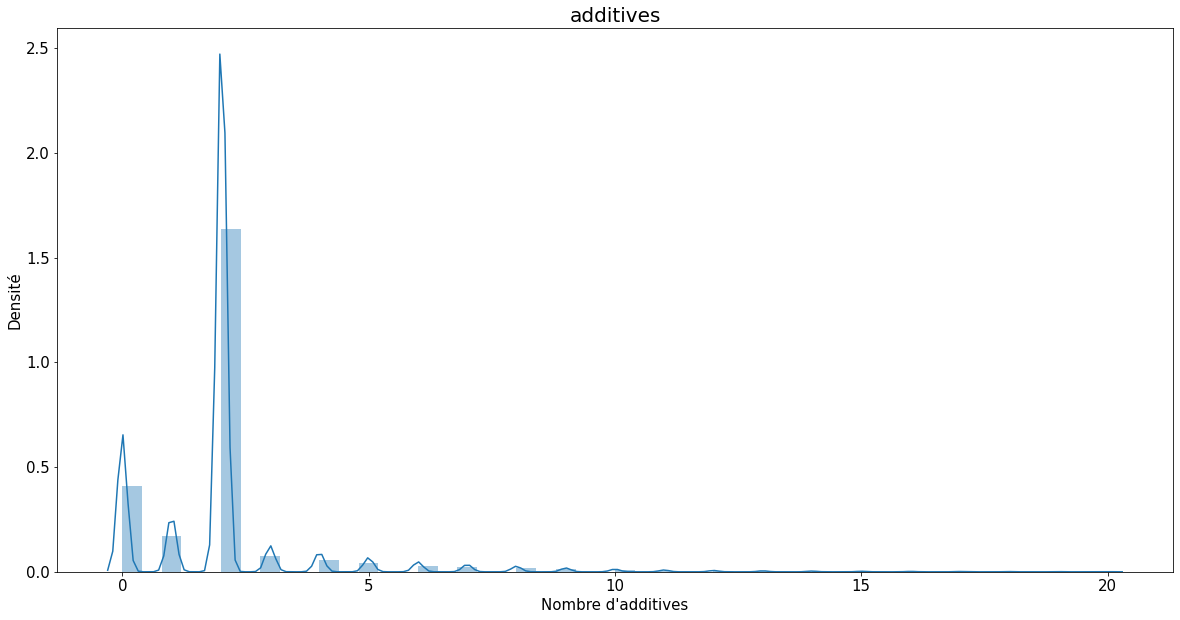

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


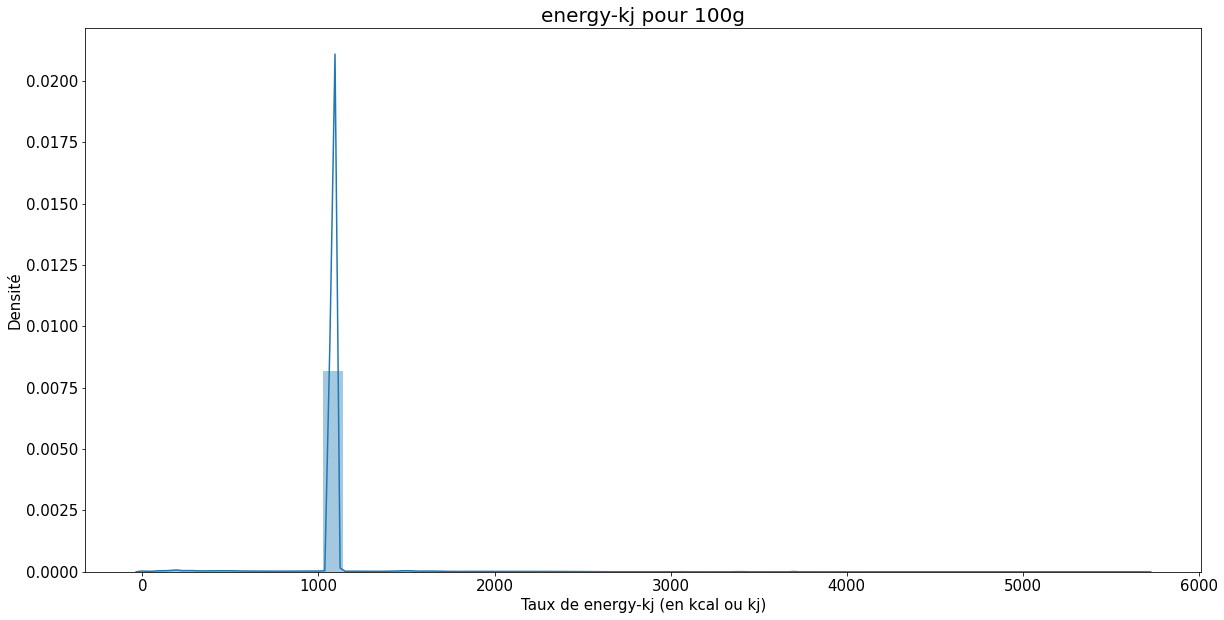

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


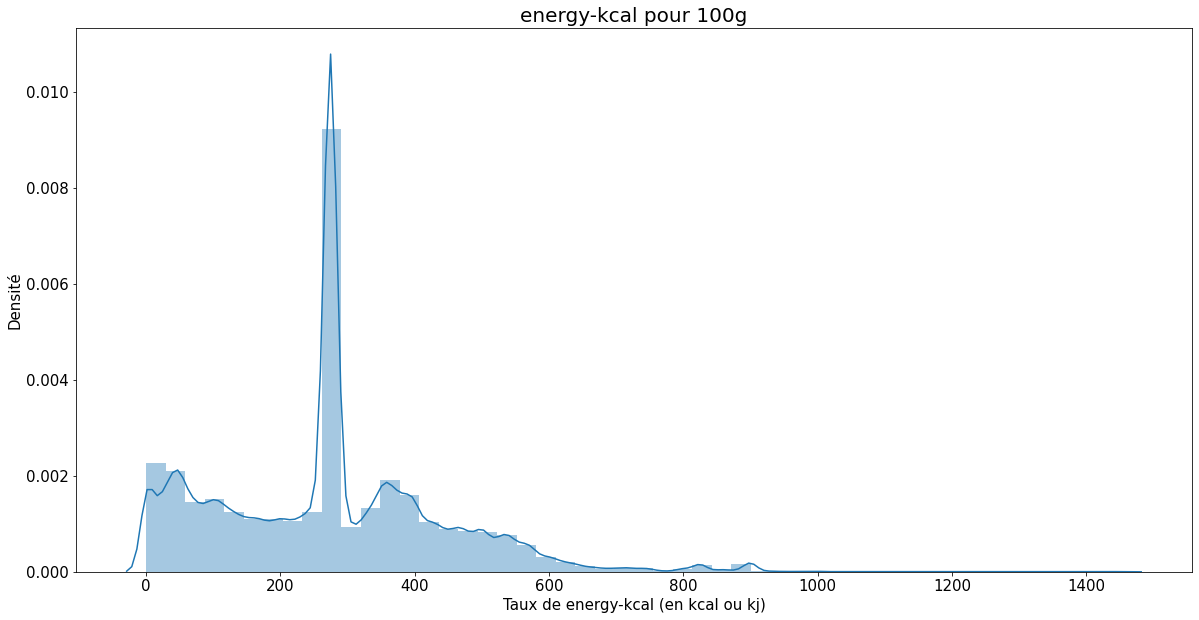

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


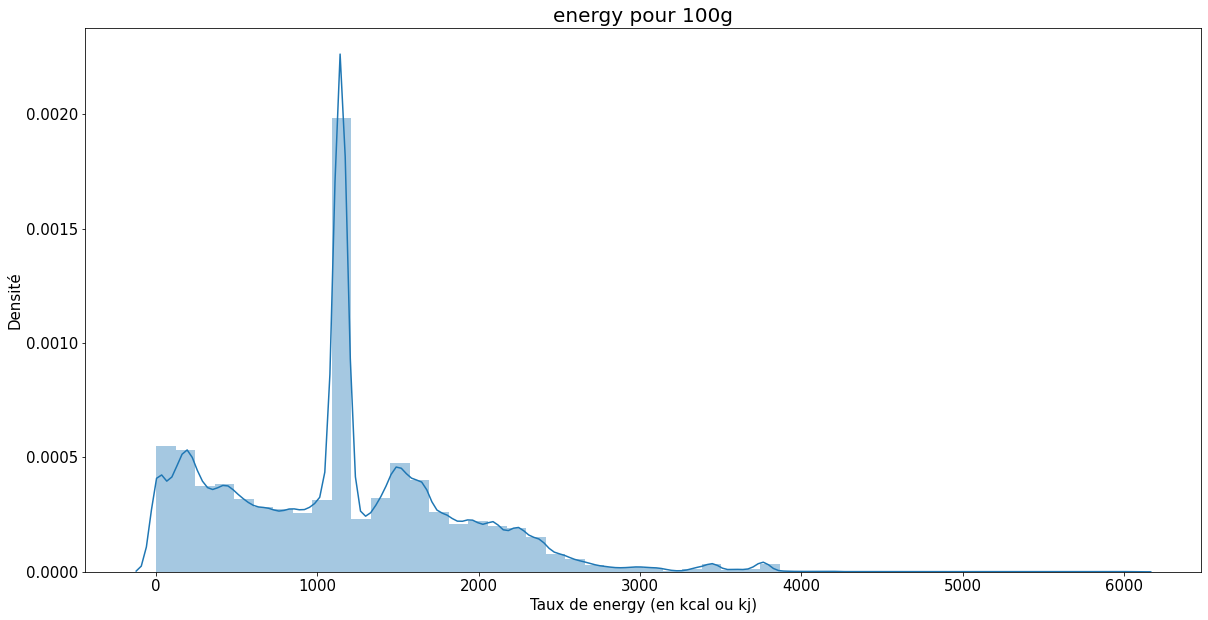

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


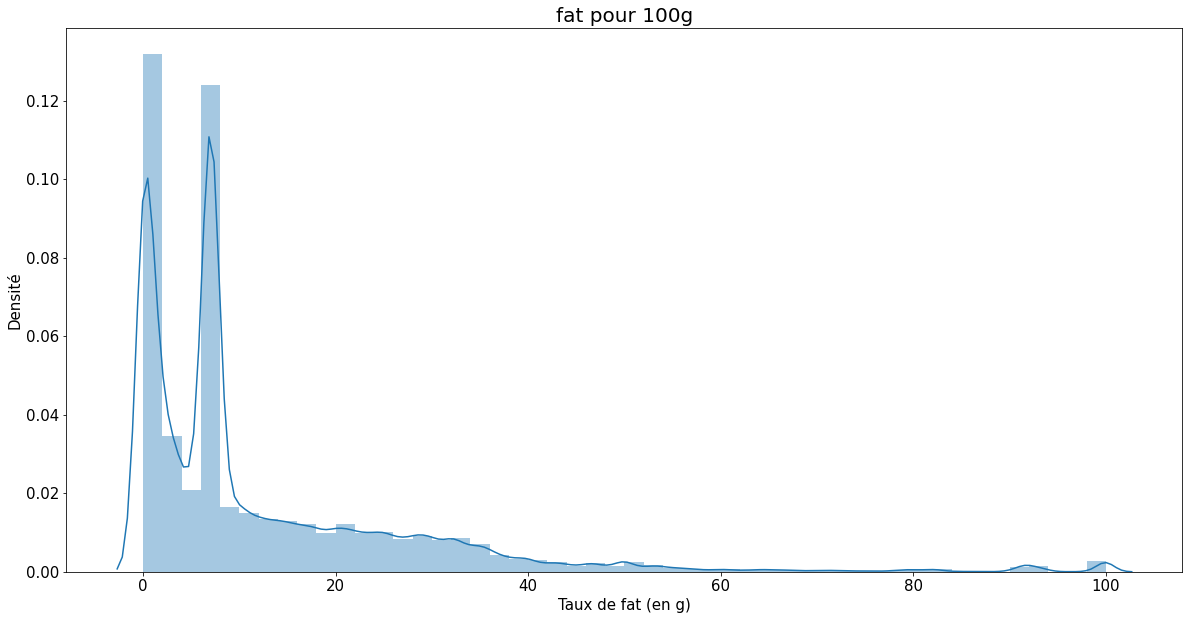

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


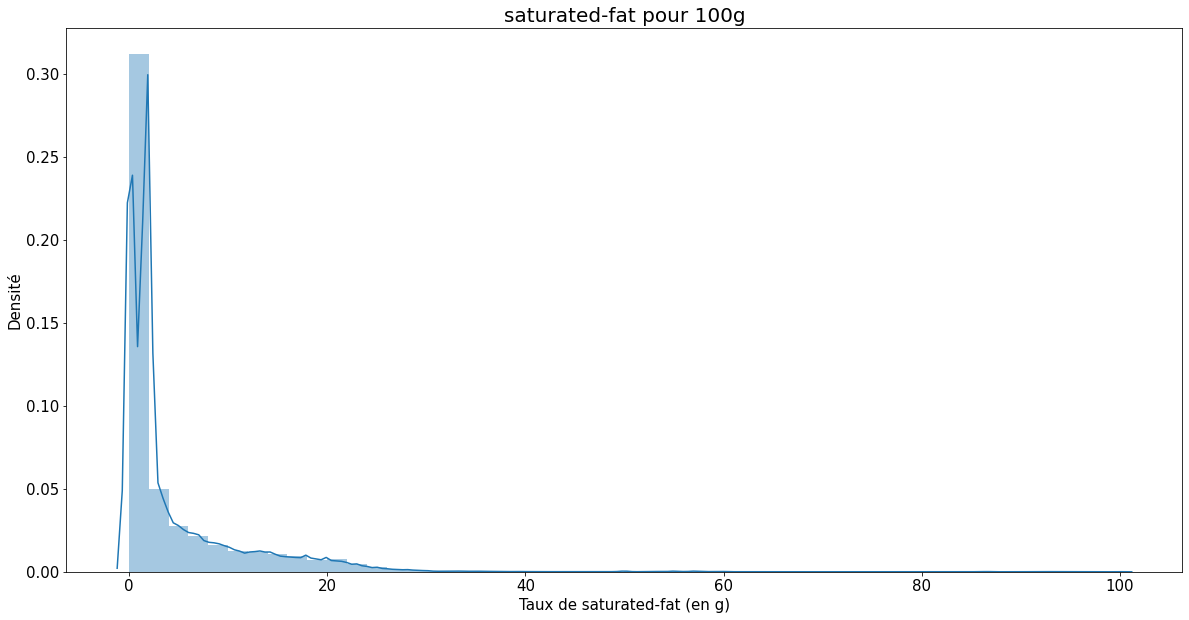

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


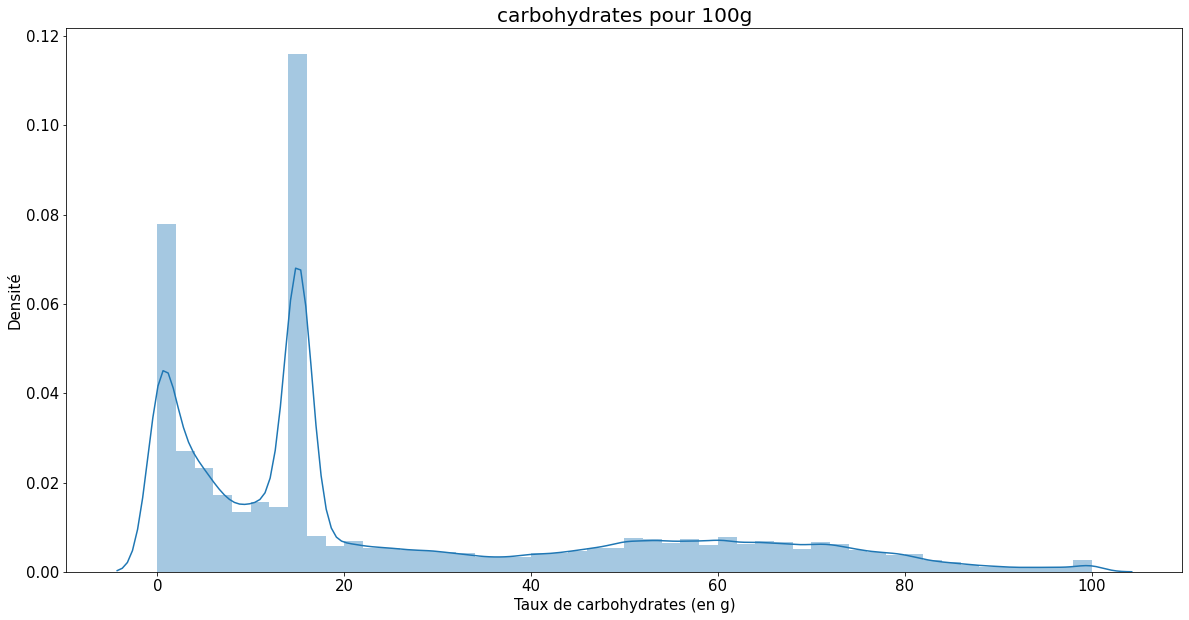

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


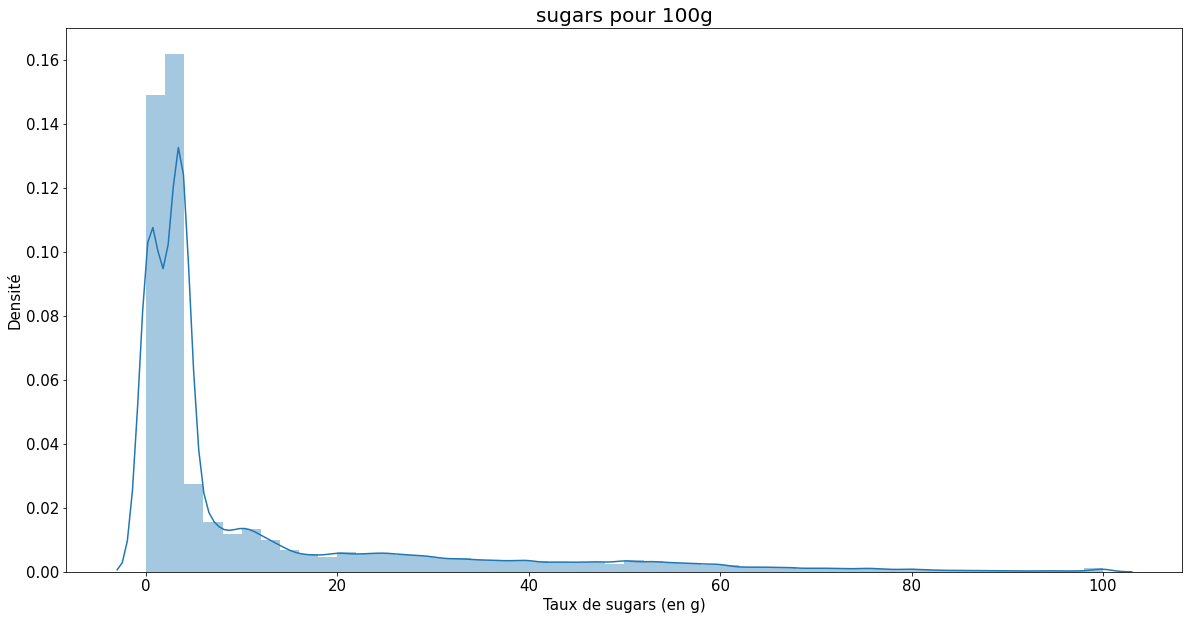

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


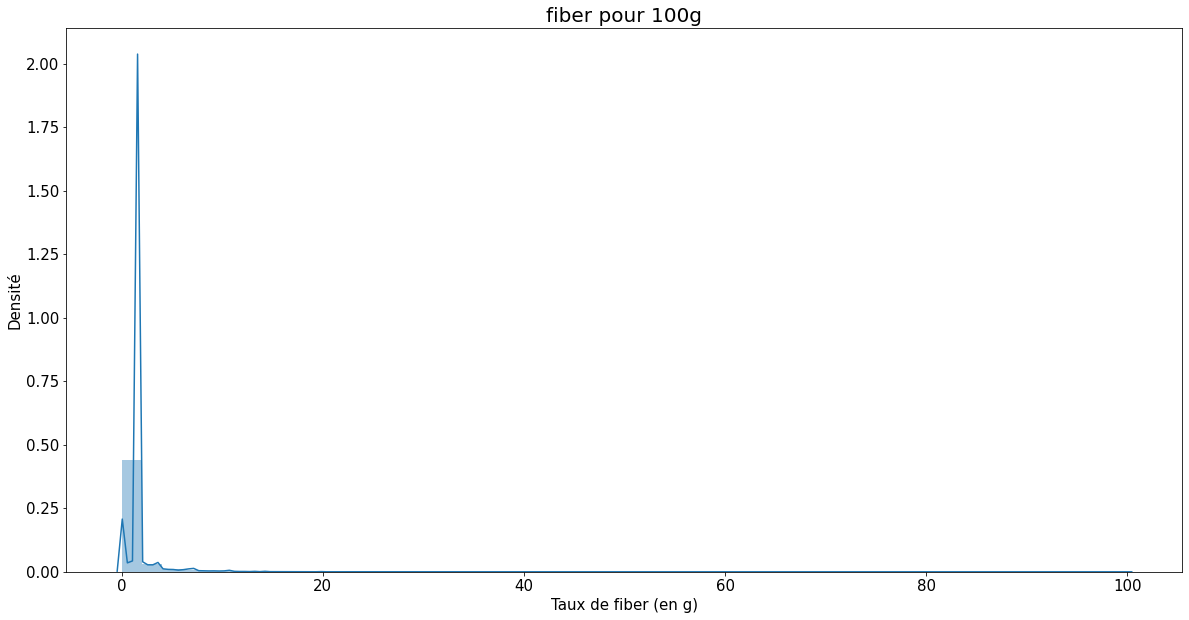

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


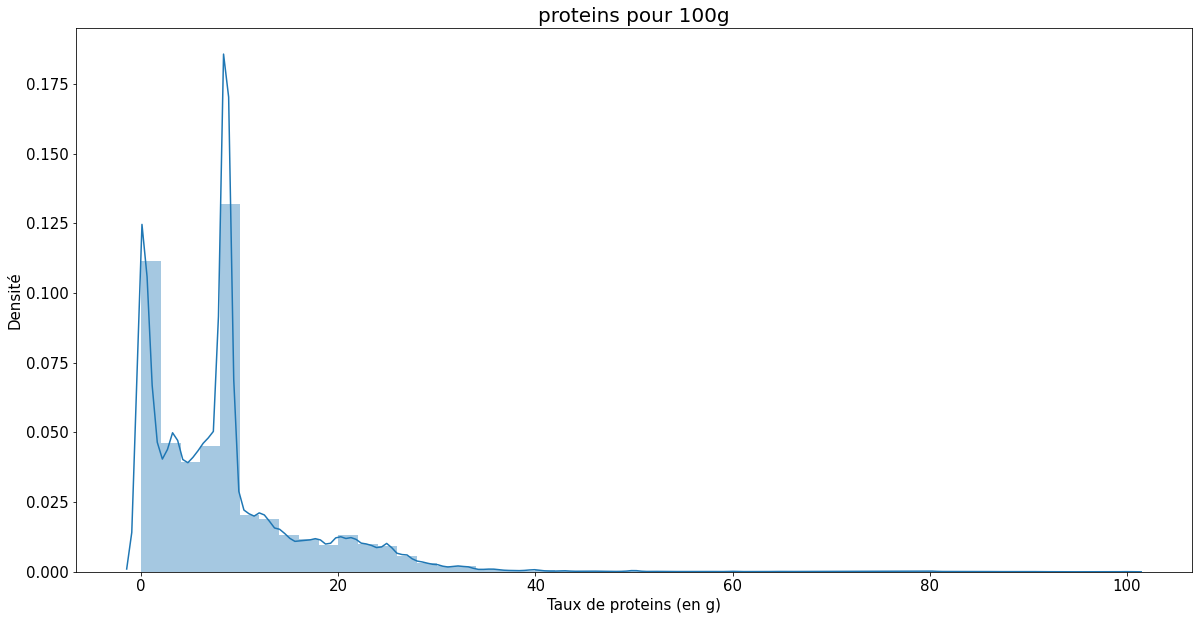

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


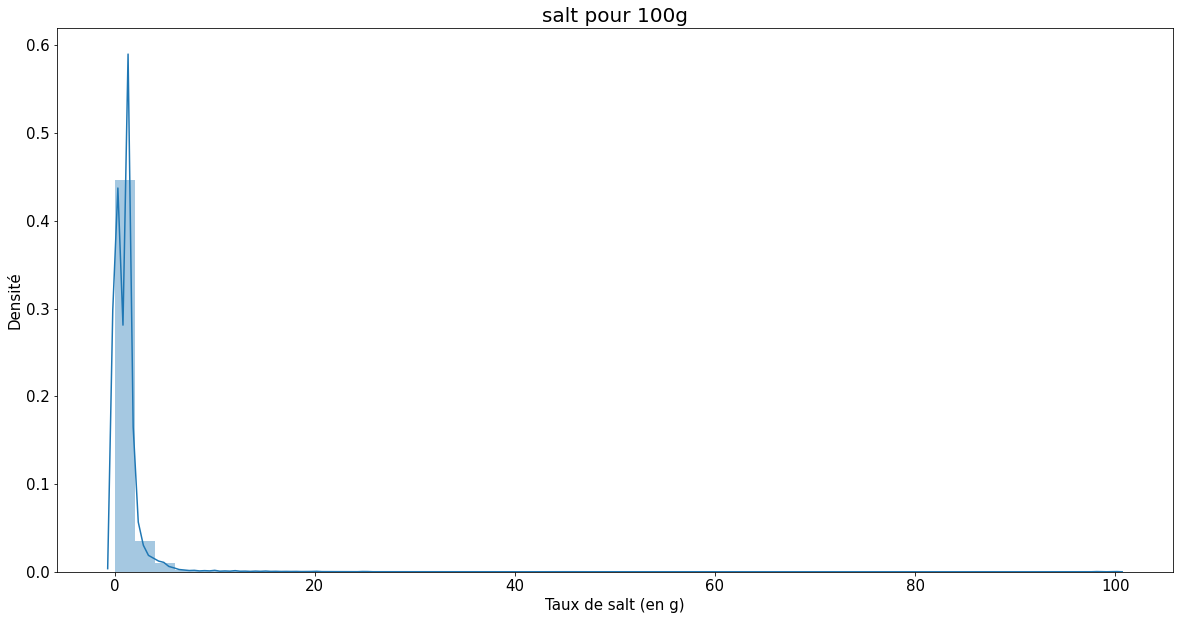

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


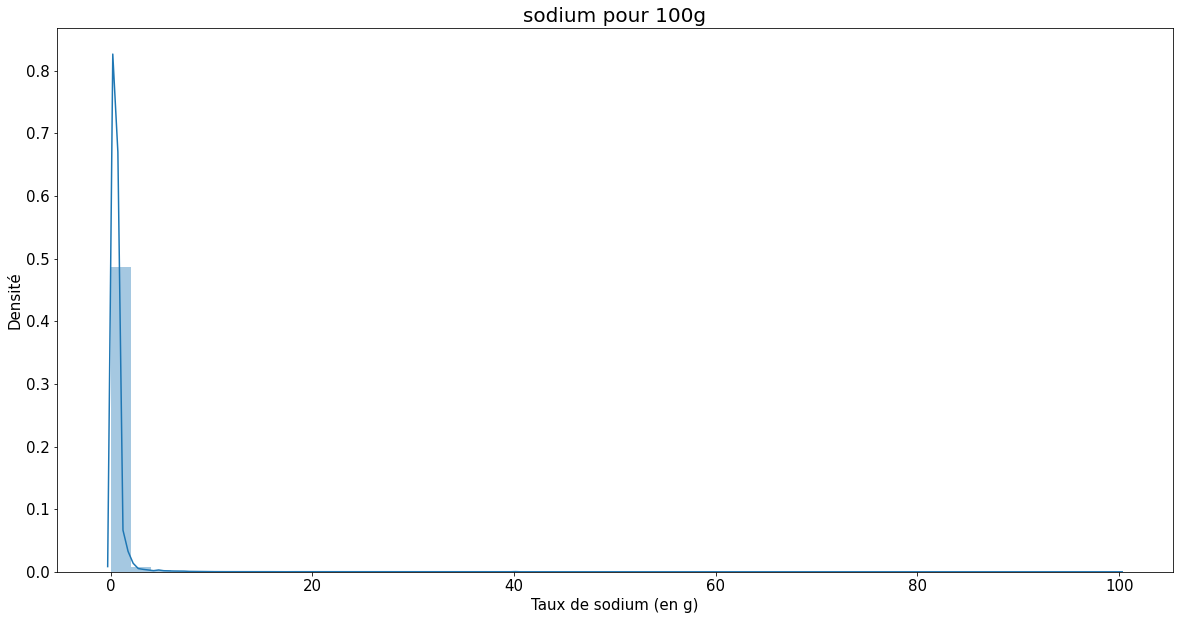

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


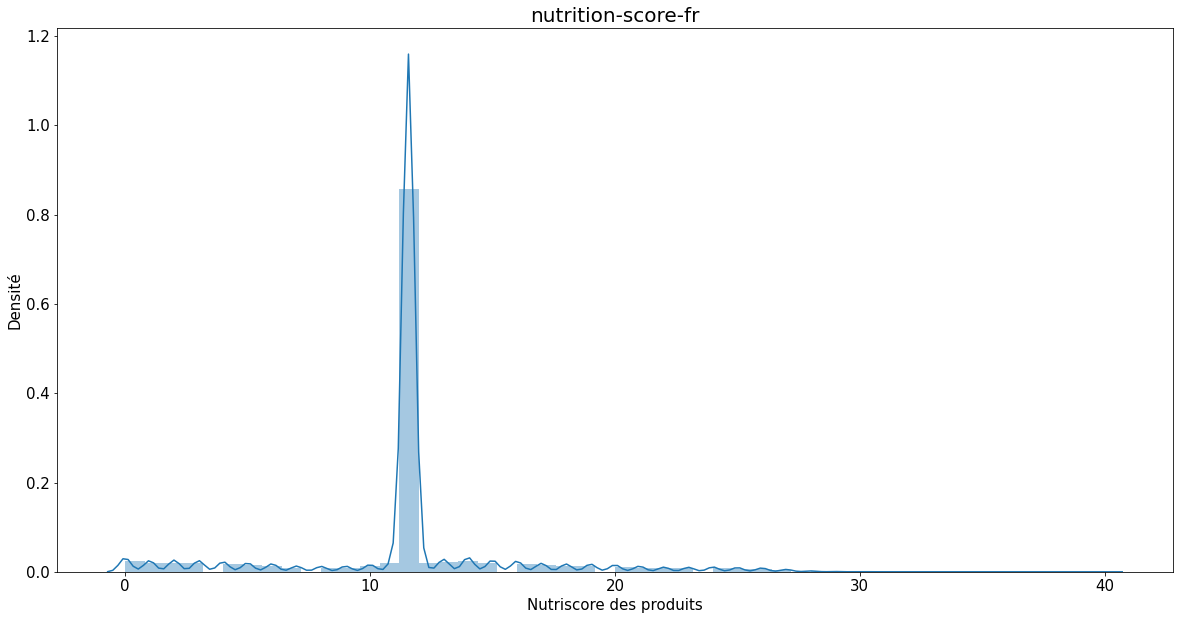

In [40]:
for variable in foodDataset.select_dtypes(include = ['int64', 'float64']).columns.tolist():
    if variable in listeVariable100g and variable not in listeEnergy and variable not in listeNutriscore:        
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodDataset[variable])  
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en g)", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()  
        
    if variable in listeEnergy:
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodDataset[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0] + " pour 100g", fontsize = 20)
        plt.xlabel("Taux de " + variable[0] + " (en kcal ou kj)", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeAdditives:
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodDataset[variable]) 
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nombre d'additives", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
        
    if variable in listeNutriscore:
        plt.figure(figsize = (20, 10))    
        sns.distplot(foodDataset[variable])   
        variable = re.split('_', variable)
        plt.title(variable[0], fontsize = 20)
        plt.xlabel("Nutriscore des produits", fontsize = 15)
        plt.ylabel("Densité", fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show() 

Regardons en détail la distribution de notre exemple après le remplacement des valeurs aberrantes et des valeurs manquantes:

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


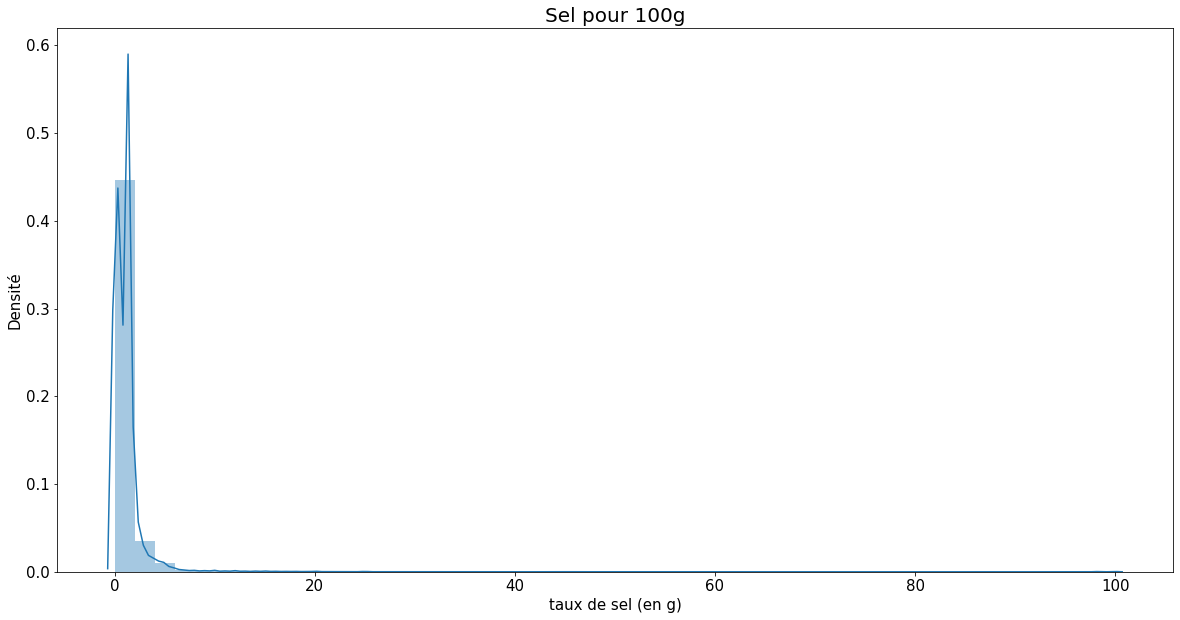

In [43]:
plt.figure(figsize = (20, 10))
sns.distplot(foodDataset['salt_100g'].dropna())
plt.title('Sel pour 100g', fontsize = 20)
plt.xlabel('taux de sel (en g)', fontsize = 15)
plt.ylabel('Densité', fontsize = 15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)

In [41]:
nombreNan = 0
nombrevaleur = foodDataset.shape[0] * foodDataset.shape[1]
for variable in foodDataset.columns:
    nombreNan = nombreNan + foodDataset[variable].isna().sum()
    
print("Taux de NaN pour le dataset: ", (nombreNan / nombrevaleur)*100)

Taux de NaN pour le dataset:  10.975272916069944


In [42]:
foodDataset.to_csv('en.openfoodfacts.org.products_9.csv', index=False)